In [12]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/gdrive/MyDrive/Colab Notebooks/github/.git/


In [14]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	FlexWork/

nothing added to commit but untracked files present (use "git add" to track)


In [15]:
!git add flexibleWorkAnalyze.ipynb
!git commit -m "Connect Google Colab and Drive"

fatal: pathspec 'flexibleWorkAnalyze.ipynb' did not match any files
On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	FlexWork/

nothing added to commit but untracked files present (use "git add" to track)


In [13]:
from google.colab import drive
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from wordcloud import WordCloud


# 폰트 설정을 위한 코드
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# !pip3 install wordcloud
plt.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 데이터

In [ ]:
df = pd.read_excel("/content/gdrive/MyDrive/flexible_work.xlsx", sheet_name="정리3")

# df.head()

In [ ]:
df_P = pd.read_excel("/content/gdrive/MyDrive/flexible_work.xlsx", sheet_name="정리4")

# df_P.head()

In [ ]:
question = df.iloc[0]
# print(question.head())

question_P = df_P.iloc[0]
# print(question_P.head())

In [ ]:
answer = df.drop(0)
# print(answer.head())

answer_P = df_P.drop(0)
# print(answer_P.head())

# Function

In [ ]:
#total answer
def get_multiple_answer_by_qno(qno):
    answer_qno = answer.filter(regex = qno)
    answer_desc = answer_qno.describe()
    answer_count = answer_desc.loc[["top", "freq"]].T.set_index("top")
    answer_count = answer_count.sort_values("freq", ascending = False)
    return answer_count


#create Title
def get_title(name, q_regex) :
  title = question.filter(regex = q_regex)
  for i in range(len(title)) :
    if title[i].split(" - ")[1] == name :
      return title[i]

#create Bar Graph
def get_bar_graph(qno, name, q_regex) :
  ax = sns.barplot(data = qno, y = qno[name], x = "count",
            palette = "Blues_r")

  title = get_title(name, q_regex)
  # ax.set_title(title)

  for i, p in enumerate(ax.patches): # loop through patches and their index
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, qno.loc[i,'count'], va='center') # access count using index

  plt.show()

#create pie graph
def get_pie_graph(qno, name, answerQuestion, q_regex) :
  plt.pie(qno, labels = answerQuestion[name].value_counts().index, autopct = '%1.1f%%', rotatelabels=True)

  title = get_title(name, q_regex)
  # plt.title(title)

  plt.show()

#create WordCloud
def get_wordcloud(qno, name, q_regex) :
  qno_dict = qno.to_dict()

  wordcloud = WordCloud(
      font_path = "NanumGothic",
      background_color = "white",
      width = 800,
      height = 800
  ).generate_from_frequencies(qno_dict)

  plt.figure(figsize = (7, 7))
  plt.imshow(wordcloud, interpolation = "bilinear")
  plt.axis("off")

  title = get_title(name, q_regex)
  plt.title(title)

  plt.show()


# 업태

In [ ]:
question["Q1"]

'업태'

In [ ]:
answer["Q1"].value_counts().sum()

np.int64(62)

전체 표본 수 : 62


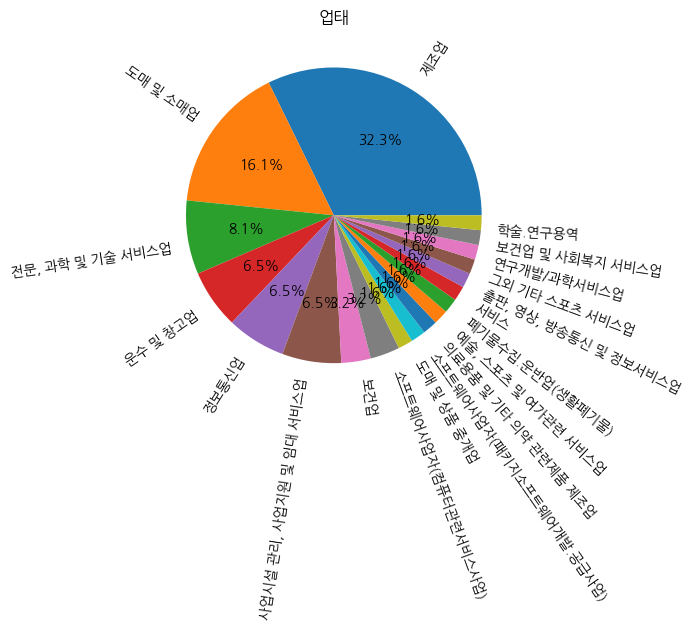

In [ ]:
plt.pie(answer["Q1"].value_counts(), labels=answer["Q1"].value_counts().index, autopct='%1.1f%%', rotatelabels=True)
plt.title(question["Q1"])

print(f"전체 표본 수 : {answer['Q1'].count()}")
plt.show()


# Q7 기업/기관에 IT 관련 업무를 전담하는 인력 및 부서가 있습니까?

In [ ]:
question["Q7"]

'기업/기관에 IT 관련 업무를 전담하는 인력 및 부서가 있습니까?'

In [ ]:
answer["Q7"].value_counts()

Q7
아니오    42
예      20
Name: count, dtype: int64

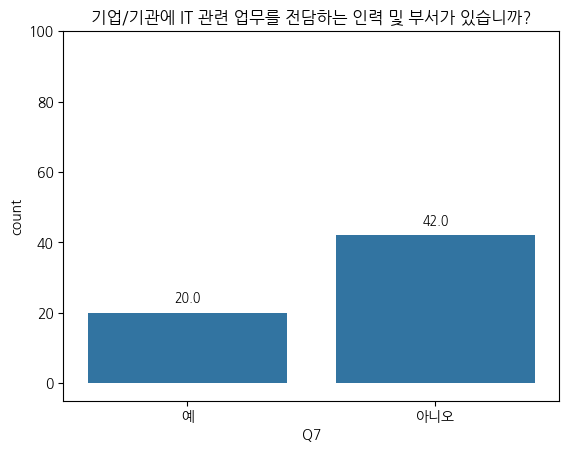

In [ ]:
ax = sns.countplot(data = answer, x="Q7")
ax.set_title(question["Q7"])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(-5, 100)
plt.show()

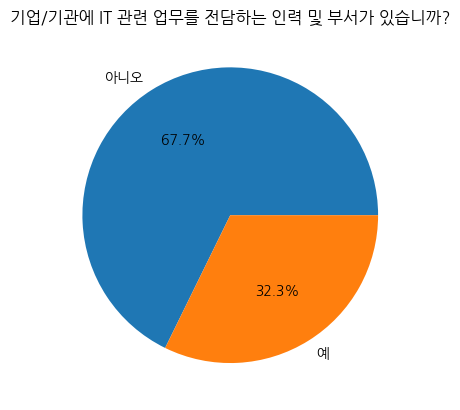

In [ ]:
plt.pie(answer["Q7"].value_counts(), labels=answer["Q7"].value_counts().index, autopct='%1.1f%%')
plt.title(question["Q7"])
plt.show()

# Q8 구성원이 일반 사무 외에도 컴퓨터 및 소프트웨어 활용 전반에 능숙합니까?
(Q7 : 아니오 응답 대상)

In [ ]:
Q7_8 = df[["Q7", "Q8"]]
Q8_N = Q7_8.loc[Q7_8["Q7"]=="아니오"]
Q8_N

Q7          Q8
2   아니오     대체로 그렇다
3   아니오     대체로 그렇다
5   아니오      매우 그렇다
6   아니오  대체로 그렇지 않다
7   아니오     대체로 그렇다
8   아니오        보통이다
10  아니오        보통이다
12  아니오     대체로 그렇다
13  아니오        보통이다
15  아니오      매우 그렇다
16  아니오        보통이다
17  아니오  대체로 그렇지 않다
18  아니오  대체로 그렇지 않다
19  아니오     대체로 그렇다
20  아니오        보통이다
21  아니오        보통이다
22  아니오  대체로 그렇지 않다
27  아니오     대체로 그렇다
28  아니오     대체로 그렇다
29  아니오     대체로 그렇다
32  아니오  대체로 그렇지 않다
33  아니오  대체로 그렇지 않다
36  아니오     대체로 그렇다
37  아니오   전혀 그렇지 않다
39  아니오        보통이다
40  아니오        보통이다
41  아니오  대체로 그렇지 않다
42  아니오        보통이다
44  아니오  대체로 그렇지 않다
45  아니오  대체로 그렇지 않다
47  아니오  대체로 그렇지 않다
48  아니오     대체로 그렇다
49  아니오     대체로 그렇다
51  아니오     대체로 그렇다
52  아니오        보통이다
53  아니오        보통이다
54  아니오  대체로 그렇지 않다
55  아니오  대체로 그렇지 않다
56  아니오  대체로 그렇지 않다
57  아니오        보통이다
59  아니오     대체로 그렇다
62  아니오     대체로 그렇다

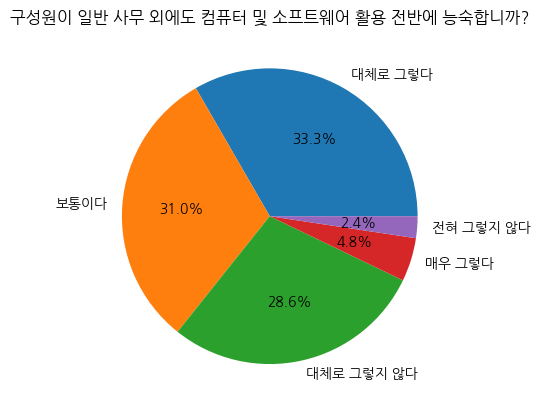

In [ ]:
plt.pie(Q8_N.value_counts(), labels=answer["Q8"].value_counts().index, autopct='%1.1f%%')
plt.title(question["Q8"])
plt.show()

# Q9 : 의사소통/협업 TOOL은 무엇입니까?

In [ ]:
question.filter(regex="Q9")[0].split(" - ")[0]

<ipython-input-17-83528dc2e4e3>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  question.filter(regex="Q9")[0].split(" - ")[0]


'의사소통/협업 TOOL은 무엇입니까?'

In [ ]:
question_9 =  question.filter(regex="Q9")
Q9 = []
for i in range(len(question_9)) :
  # print(question_13[i].split(" - ")[1])
  Q9.append(question_9[i].split(" - ")[1])
Q9

<ipython-input-18-e6597999e036>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q9.append(question_9[i].split(" - ")[1])


['그룹웨어', '메신저', '이메일', '전자결재 및 일정관리', '파일공유 및 저장', '화상회의', '협업 솔루션']

In [ ]:
answer_Q9 = answer.filter(regex="Q9")

answer_Q9.columns = Q9
answer_Q9

그룹웨어              메신저          이메일   전자결재 및 일정관리  \
1    NAVER WORKS      NAVER WORKS  NAVER WORKS   NAVER WORKS   
2             없음            카카오워크        NAVER            없음   
3          다우오피스  Microsoft Teams      기업용 이메일        Notion   
4          메일플러그            메일플러그        메일플러그         메일플러그   
5             없음               없음           없음            없음   
..           ...              ...          ...           ...   
58          G-포털             카카오톡         G-포털          G-포털   
59          이카운트               없음           없음            없음   
60      collabee         Telegram       G-mail        Notion   
61  Bizbox Alpha               없음      기업용 이메일  Bizbox Alpha   
62            없음             카카오톡        NAVER            없음   

             파일공유 및 저장             화상회의       협업 솔루션  
1                  NAS      NAVER WORKS  NAVER WORKS  
2                  NAS               없음           없음  
3   Microsoft OneDrive             Zoom       Notion  
4                메일플러그               없음           없음  
5                   사용               없음           없음  
..                 ...              ...          ...  
58                G-포털             Zoom           없음  
59                 NAS             Zoom           없음  
60                 NAS  Microsoft Teams      Discord  
61        Google Drive               없음           없음  
62                  없음               없음           없음  

[62 rows x 7 columns]

In [ ]:
# answer_Q9["그룹웨어"].value_counts()
# answer_Q9["메신저"].value_counts()
# answer_Q9["이메일"].value_counts()
# answer_Q9["전자결재 및 일정관리"].value_counts()
# answer_Q9["파일공유 및 저장"].value_counts()
# answer_Q9["화상회의"].value_counts()
# answer_Q9["협업 솔루션"].value_counts()

In [ ]:
answer_Q9_desc = answer_Q9.describe()
answer_Q9_desc

그룹웨어   메신저 이메일 전자결재 및 일정관리 파일공유 및 저장 화상회의 협업 솔루션
count    62    62  62          62        62   62     62
unique   21    16  20          21        14    5     16
top      없음  카카오톡  없음          없음       NAS   없음     없음
freq     26    24  15          23        16   34     34

In [ ]:
get_multiple_answer_by_qno("Q9")

freq
top      
없음     34
없음     34
없음     26
카카오톡   24
없음     23
NAS    16
없음     15

<ipython-input-23-b62cc54a67c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = Q9_answer_table, y = "freq", x = Q9_answer_table.index,


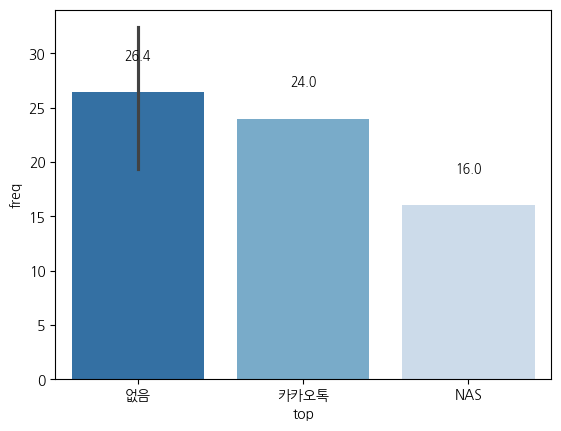

In [ ]:
Q9_answer_table = get_multiple_answer_by_qno("Q9")

ax = sns.barplot(data = Q9_answer_table, y = "freq", x = Q9_answer_table.index,
            palette = "Blues_r")
# ax.set_title(question.filter(regex = "Q9")[0].split("-")[0])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

plt.show()

의사소통/협업 TOOL은 무엇입니까? - 그룹웨어

In [ ]:
# name = "그룹웨어"
regex = "Q9"
name = (question.filter(regex = regex))[0]
name = name.split(" - ")[1]
print(name)

그룹웨어


<ipython-input-24-9db9cfbfbe13>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = (question.filter(regex = regex))[0]


<ipython-input-7-b4c77ad56257>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = qno, y = qno[name], x = "count",
<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


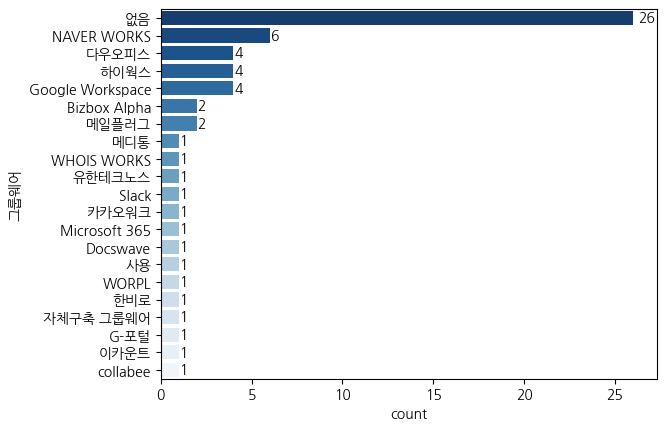

In [ ]:
q9_1 = answer_Q9[name].value_counts().reset_index()

get_bar_graph(q9_1, name, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


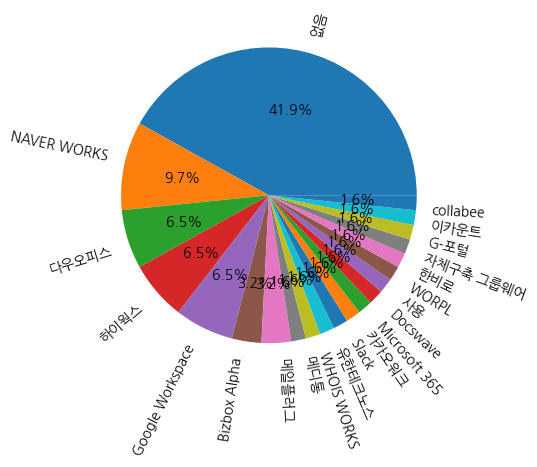

In [ ]:
answerQuestion = answer_Q9

q9_1 = answer_Q9[name].value_counts()

get_pie_graph(q9_1, name, answerQuestion, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


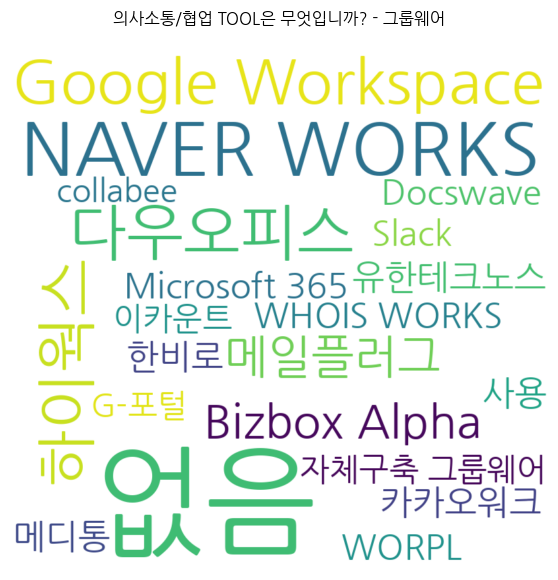

In [ ]:
get_wordcloud(q9_1, name, regex)

의사소통/협업 TOOL은 무엇입니까? - 메신저

In [ ]:
# name = "메신저"
# regex = "Q9"
name = (question.filter(regex = regex))[1]
name = name.split(" - ")[1]
print(name)

메신저


<ipython-input-28-91b9e8772919>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = (question.filter(regex = regex))[1]


<ipython-input-7-b4c77ad56257>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = qno, y = qno[name], x = "count",
<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


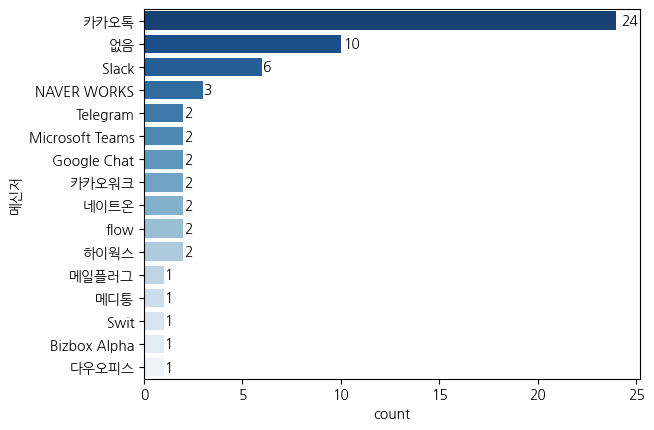

In [ ]:
q9_2 = answer_Q9[name].value_counts().reset_index()

get_bar_graph(q9_2, name, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


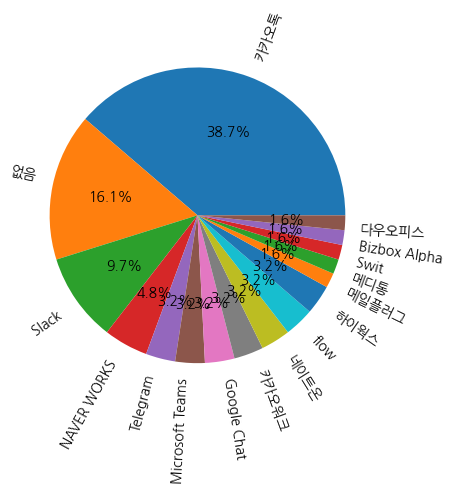

In [ ]:
answerQuestion = answer_Q9

q9_2 = answer_Q9[name].value_counts()

get_pie_graph(q9_2, name, answerQuestion, regex)


<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


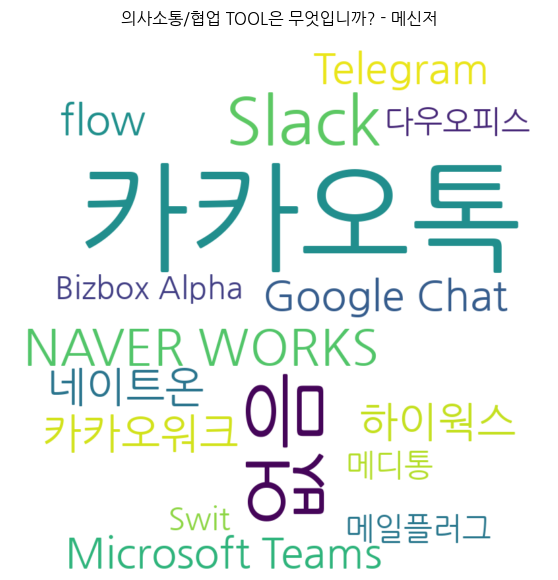

In [ ]:
get_wordcloud(q9_2, name, regex)

의사소통/협업 TOOL은 무엇입니까? - 이메일

In [ ]:
# name = "이메일"
# regex = "Q9"
name = (question.filter(regex = regex))[2]
name = name.split(" - ")[1]
print(name)

이메일


<ipython-input-32-26246ebed960>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = (question.filter(regex = regex))[2]


<ipython-input-7-b4c77ad56257>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = qno, y = qno[name], x = "count",
<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


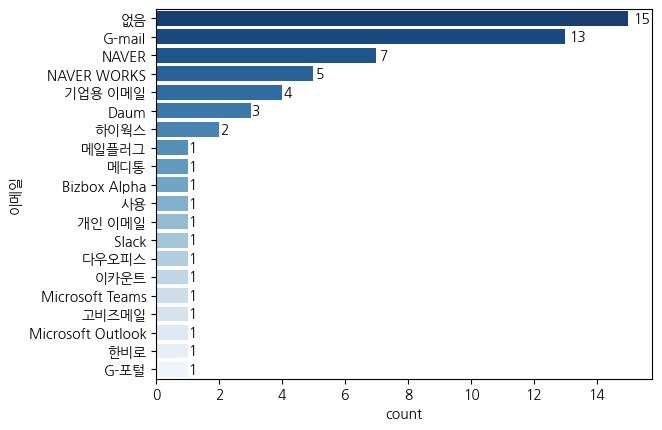

In [ ]:
q9_3 = answer_Q9[name].value_counts().reset_index()

get_bar_graph(q9_3, name, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


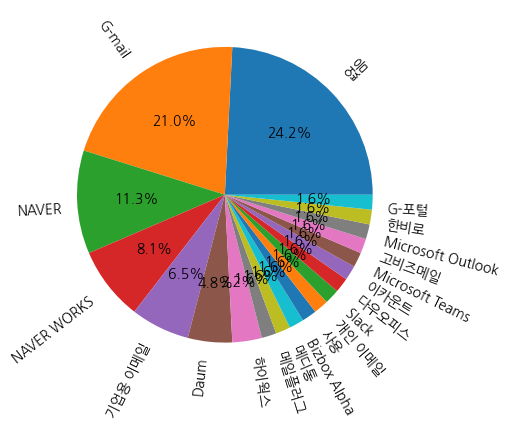

In [ ]:
answerQuestion = answer_Q9

q9_3 = answer_Q9[name].value_counts()

get_pie_graph(q9_3, name, answerQuestion, regex)


<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


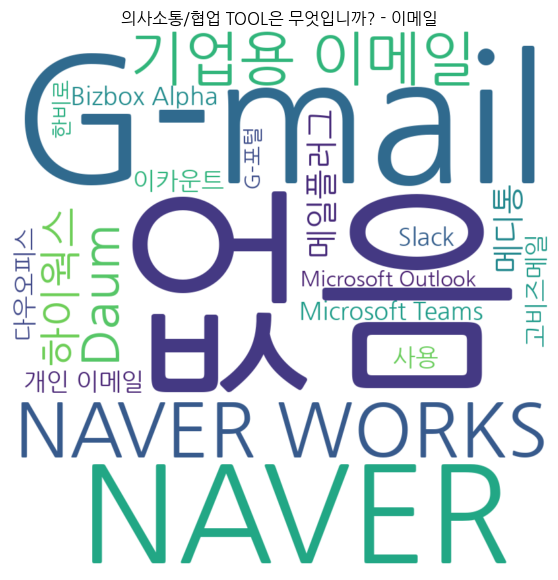

In [ ]:
get_wordcloud(q9_3, name, regex)

의사소통/협업 TOOL은 무엇입니까? - 전자결재 및 일정관리

In [ ]:
# name = "전자결재 및 일정관리"
# regex = "Q9"
name = (question.filter(regex = regex))[3]
name = name.split(" - ")[1]
print(name)

전자결재 및 일정관리


<ipython-input-36-7dbda0b67078>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = (question.filter(regex = regex))[3]


<ipython-input-7-b4c77ad56257>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = qno, y = qno[name], x = "count",
<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


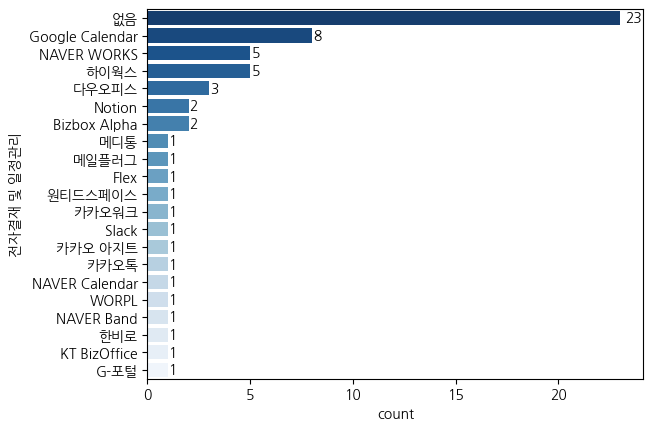

In [ ]:
q9_4 = answer_Q9[name].value_counts().reset_index()

get_bar_graph(q9_4, name, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


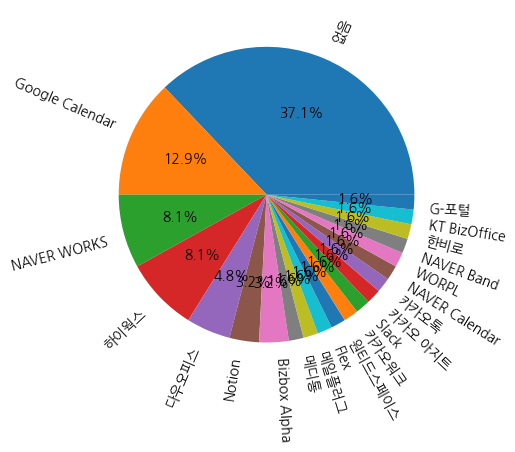

In [ ]:
answerQuestion = answer_Q9

q9_4 = answer_Q9[name].value_counts()

get_pie_graph(q9_4, name, answerQuestion, regex)


<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


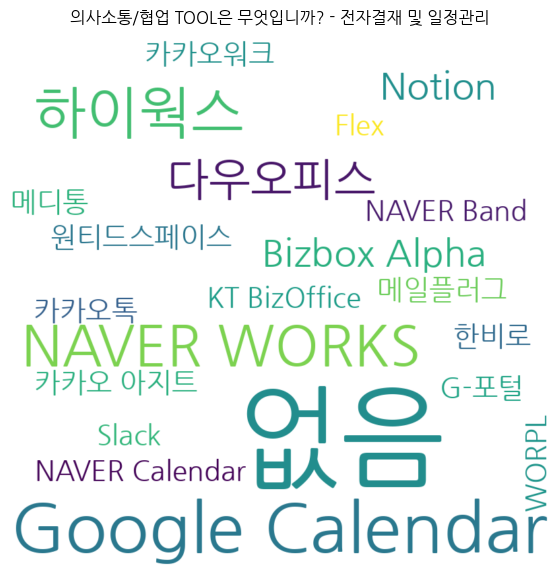

In [ ]:
get_wordcloud(q9_4, name, regex)

의사소통/협업 TOOL은 무엇입니까? - 파일공유 및 저장

In [ ]:
# name = "파일공유 및 저장"
# regex = "Q9"
name = (question.filter(regex = regex))[4]
name = name.split(" - ")[1]
print(name)

<ipython-input-40-7814b6d9d526>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = (question.filter(regex = regex))[4]


파일공유 및 저장


<ipython-input-7-b4c77ad56257>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = qno, y = qno[name], x = "count",
<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


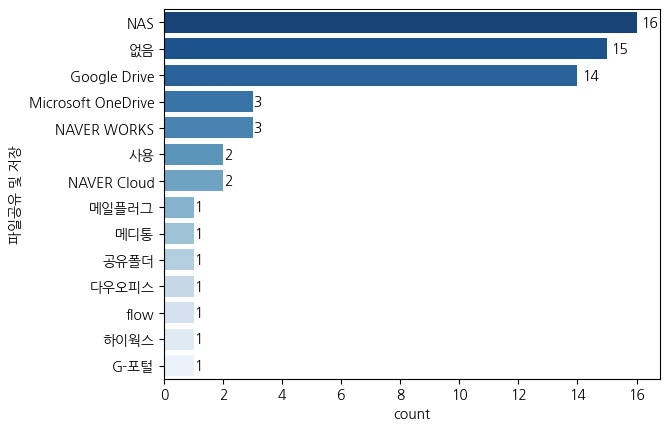

In [ ]:
q9_5 = answer_Q9[name].value_counts().reset_index()

get_bar_graph(q9_5, name, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


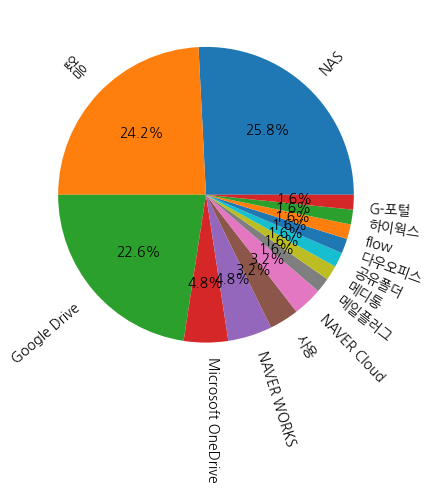

In [ ]:
answerQuestion = answer_Q9

q9_5 = answer_Q9[name].value_counts()

get_pie_graph(q9_5, name, answerQuestion, regex)


<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


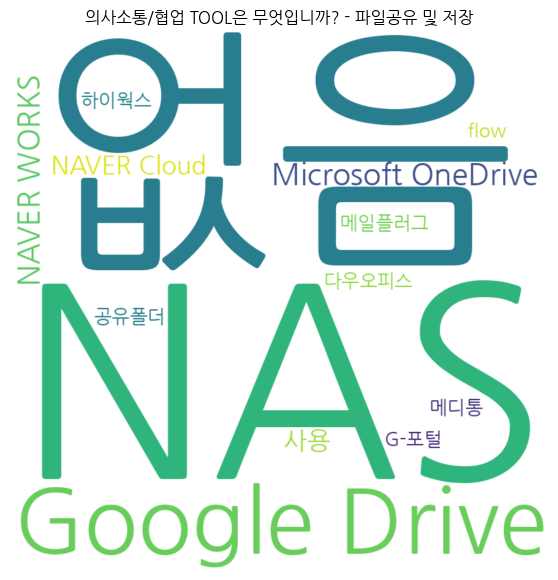

In [ ]:
get_wordcloud(q9_5, name, regex)

의사소통/협업 TOOL은 무엇입니까? - 화상회의

In [ ]:
# name = "화상회의"
# regex = "Q9"
name = (question.filter(regex = regex))[5]
name = name.split(" - ")[1]
print(name)

화상회의


<ipython-input-44-3f2dbd0a0610>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = (question.filter(regex = regex))[5]


<ipython-input-7-b4c77ad56257>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = qno, y = qno[name], x = "count",
<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


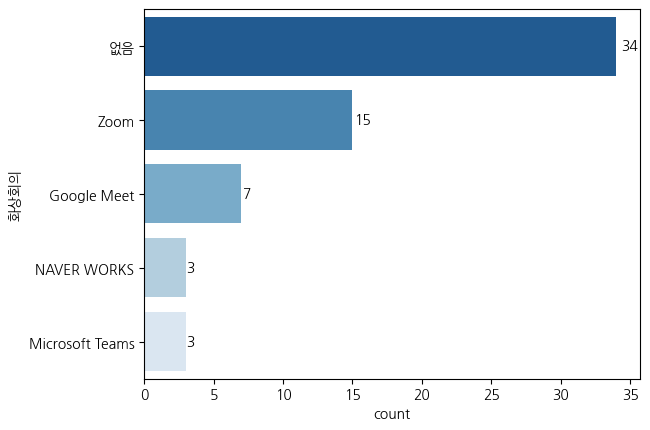

In [ ]:
q9_6 = answer_Q9[name].value_counts().reset_index()

get_bar_graph(q9_6, name, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


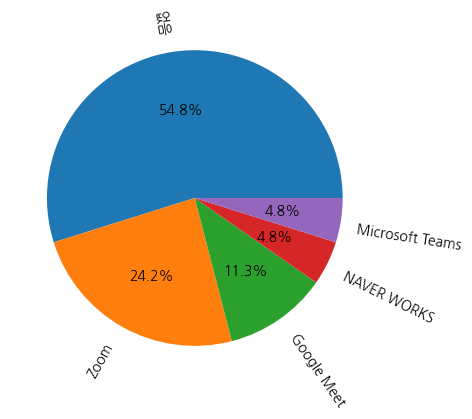

In [ ]:
answerQuestion = answer_Q9

q9_6 = answer_Q9[name].value_counts()

get_pie_graph(q9_6, name, answerQuestion, regex)


<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


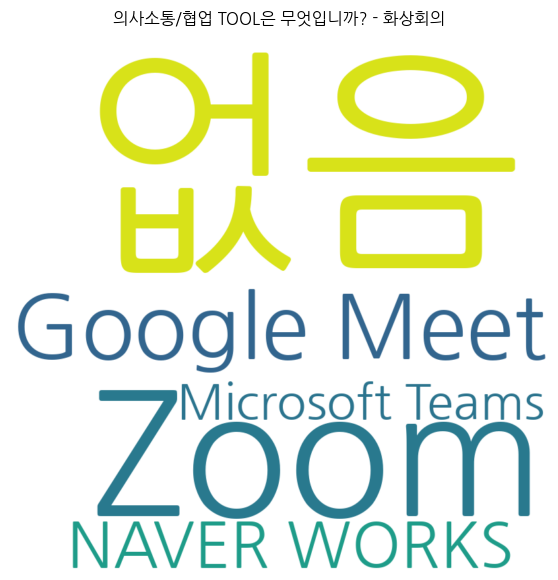

In [ ]:
get_wordcloud(q9_6, name, regex)

의사소통/협업 TOOL은 무엇입니까? - 협업 솔루션

In [ ]:
# name = "협업 솔루션"
# regex = "Q9"
name = (question.filter(regex = regex))[6]
name = name.split(" - ")[1]
print(name)

협업 솔루션


<ipython-input-48-c259b654bae2>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = (question.filter(regex = regex))[6]


<ipython-input-7-b4c77ad56257>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = qno, y = qno[name], x = "count",
<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


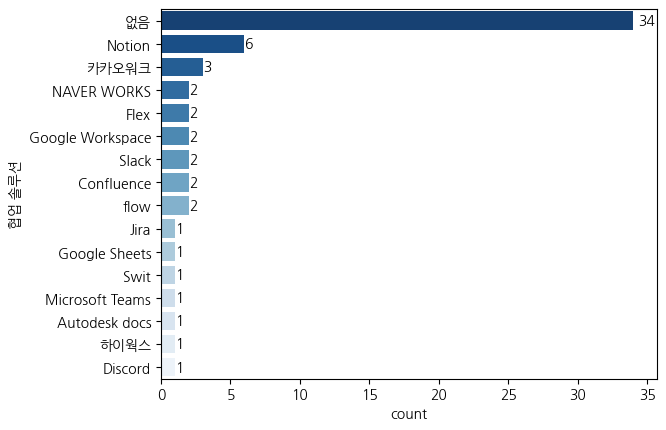

In [ ]:
q9_7 = answer_Q9[name].value_counts().reset_index()

get_bar_graph(q9_7, name, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


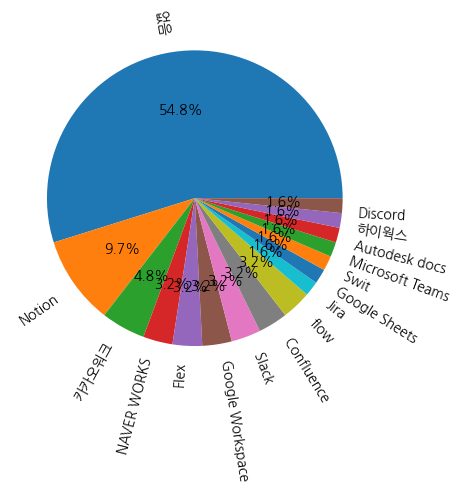

In [ ]:
answerQuestion = answer_Q9

q9_7 = answer_Q9[name].value_counts()

get_pie_graph(q9_7, name, answerQuestion, regex)


<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


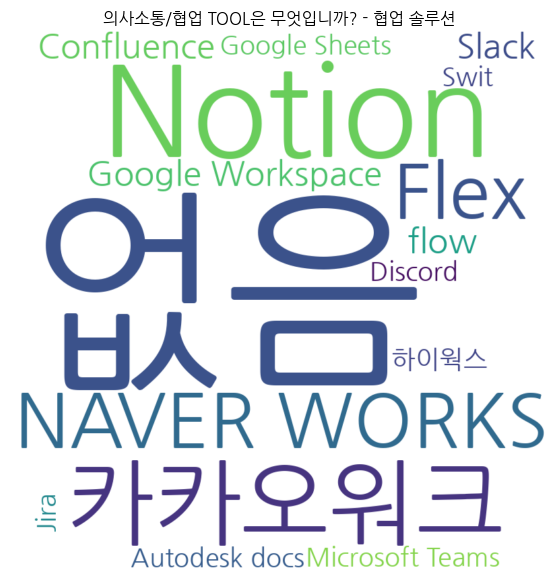

In [ ]:
get_wordcloud(q9_7, name, regex)

# Q10 보안 TOOL은 무엇입니까?

In [ ]:
question.filter(regex="Q10")[0].split(" - ")[0]

<ipython-input-52-b4ed62423d7a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  question.filter(regex="Q10")[0].split(" - ")[0]


'보안 TOOL은 무엇입니까?'

In [ ]:
question_10 =  question.filter(regex="Q10")
Q10 = []
for i in range(len(question_10)) :
  # print(question_13[i].split(" - ")[1])
  Q10.append(question_10[i].split(" - ")[1])
Q10

<ipython-input-53-c8ec8289f220>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q10.append(question_10[i].split(" - ")[1])


['기업용 백신', '통합 PC보안', 'VPN', '문서중앙화']

In [ ]:
answer_Q10 = answer.filter(regex="Q10")

answer_Q10.columns = Q10
answer_Q10

기업용 백신 통합 PC보안 VPN       문서중앙화
1   Microsoft Defender      없음  없음          없음
2                   없음      없음  없음          없음
3                   없음      없음  없음          없음
4                   없음      없음  없음          없음
5                   알약      없음  없음          없음
..                 ...     ...  ..         ...
58                  알약     NAC  없음  개인정보보호 시스템
59                  알약      없음  없음          없음
60                  없음      없음  없음          없음
61                  없음      없음  없음          없음
62                  없음      없음  없음          없음

[62 rows x 4 columns]

In [ ]:
answer_Q10_desc = answer_Q10.describe()
answer_Q10_desc

기업용 백신 통합 PC보안 VPN 문서중앙화
count      62      62  62    62
unique     10       7   5     5
top        없음      없음  없음    없음
freq       28      56  58    58

In [ ]:
get_multiple_answer_by_qno("Q10")

freq
top     
없음    58
없음    58
없음    56
없음    28

<ipython-input-57-4fe53fb8a156>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = Q10_answer_table, y = "freq", x = Q10_answer_table.index,
<ipython-input-57-4fe53fb8a156>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title(question.filter(regex = "Q10")[0].split("-")[0])


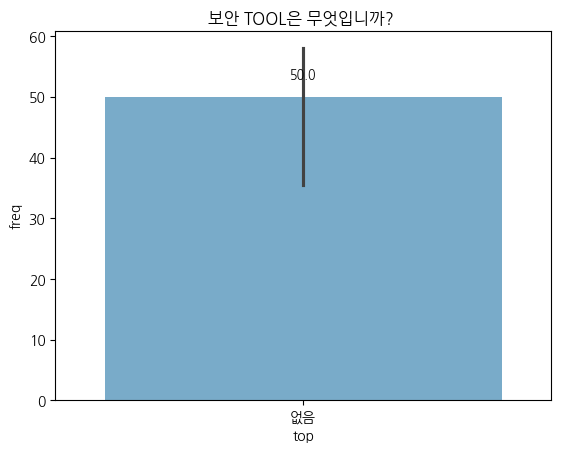

In [ ]:
Q10_answer_table = get_multiple_answer_by_qno("Q10")

ax = sns.barplot(data = Q10_answer_table, y = "freq", x = Q10_answer_table.index,
            palette = "Blues_r")
ax.set_title(question.filter(regex = "Q10")[0].split("-")[0])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

plt.show()

보안 TOOL은 무엇입니까? - 기업용 백신

In [ ]:
regex = "Q10"
name = (question.filter(regex = regex))[0]
name = name.split(" - ")[1]
print(name)

기업용 백신


<ipython-input-58-f20c218f8da5>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = (question.filter(regex = regex))[0]


<ipython-input-7-b4c77ad56257>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = qno, y = qno[name], x = "count",
<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


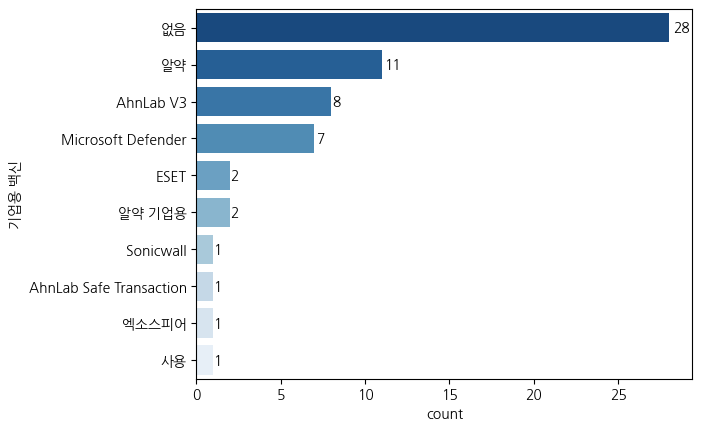

In [ ]:
q10_1 = answer_Q10[name].value_counts().reset_index()

get_bar_graph(q10_1, name, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


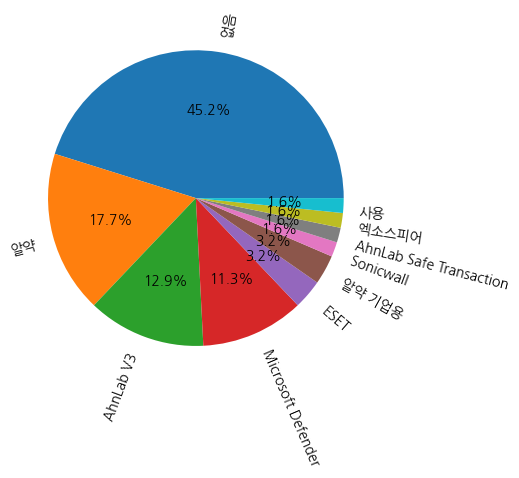

In [ ]:
answerQuestion = answer_Q10

q10_1 = answer_Q10[name].value_counts()

get_pie_graph(q10_1, name, answerQuestion, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


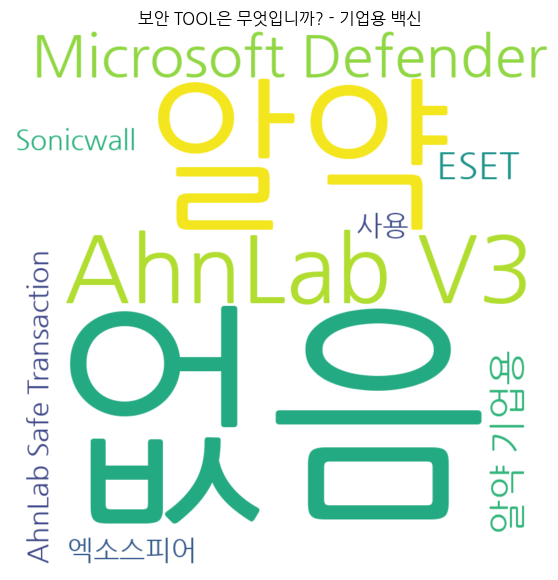

In [ ]:
get_wordcloud(q10_1, name, regex)

보안 TOOL은 무엇입니까? - 통합 PC보안

In [ ]:
regex = "Q10"
name = (question.filter(regex = regex))[1]
name = name.split(" - ")[1]
print(name)

통합 PC보안


<ipython-input-62-7fc546c53a3f>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = (question.filter(regex = regex))[1]


<ipython-input-7-b4c77ad56257>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = qno, y = qno[name], x = "count",
<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


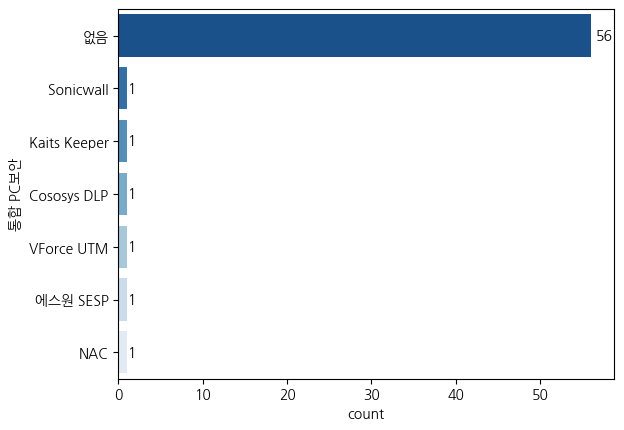

In [ ]:
q10_2 = answer_Q10[name].value_counts().reset_index()

get_bar_graph(q10_2, name, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


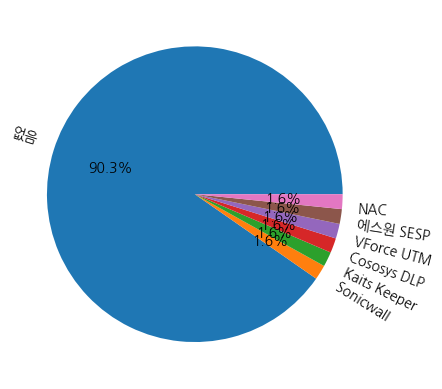

In [ ]:
answerQuestion = answer_Q10

q10_2 = answer_Q10[name].value_counts()

get_pie_graph(q10_2, name, answerQuestion, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


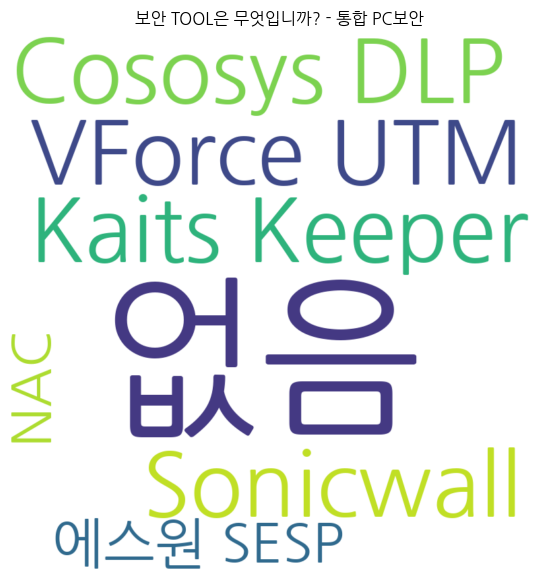

In [ ]:
get_wordcloud(q10_2, name, regex)

보안 TOOL은 무엇입니까? - VPN

In [ ]:
regex = "Q10"
name = (question.filter(regex = regex))[2]
name = name.split(" - ")[1]
print(name)

VPN


<ipython-input-66-2127ad2c8810>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = (question.filter(regex = regex))[2]


<ipython-input-7-b4c77ad56257>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = qno, y = qno[name], x = "count",
<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


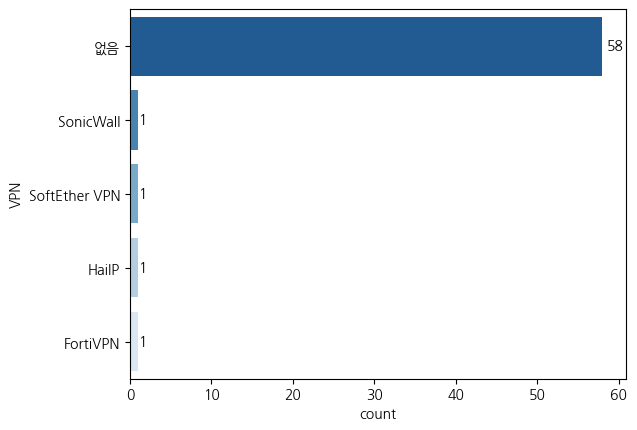

In [ ]:
q10_3 = answer_Q10[name].value_counts().reset_index()

get_bar_graph(q10_3, name, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


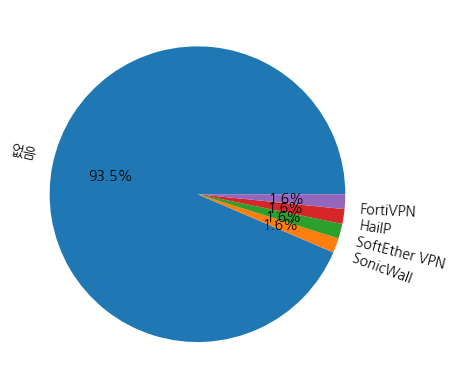

In [ ]:
answerQuestion = answer_Q10

q10_3 = answer_Q10[name].value_counts()

get_pie_graph(q10_3, name, answerQuestion, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


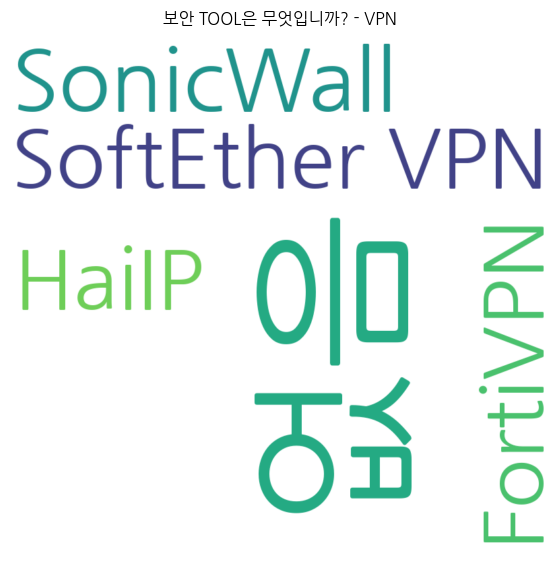

In [ ]:
get_wordcloud(q10_3, name, regex)

보안 TOOL은 무엇입니까? - 문서중앙화

In [ ]:
regex = "Q10"
name = (question.filter(regex = regex))[3]
name = name.split(" - ")[1]
print(name)

문서중앙화


<ipython-input-70-f2eafe63f2d4>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = (question.filter(regex = regex))[3]


<ipython-input-7-b4c77ad56257>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = qno, y = qno[name], x = "count",
<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


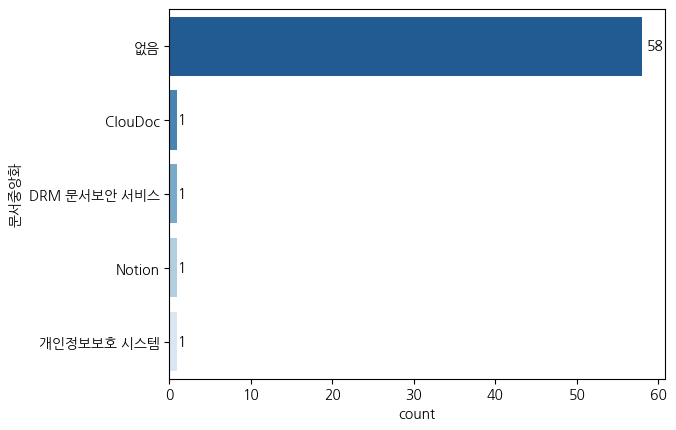

In [ ]:
q10_4 = answer_Q10[name].value_counts().reset_index()

get_bar_graph(q10_4, name, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


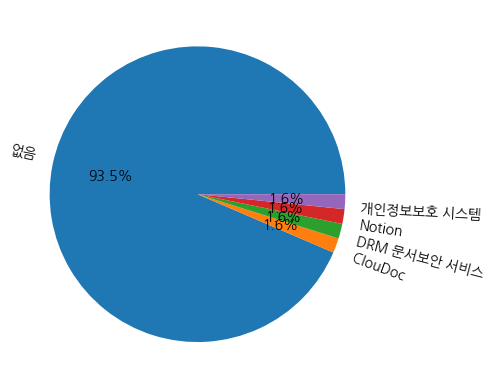

In [ ]:
answerQuestion = answer_Q10

q10_4 = answer_Q10[name].value_counts()

get_pie_graph(q10_4, name, answerQuestion, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


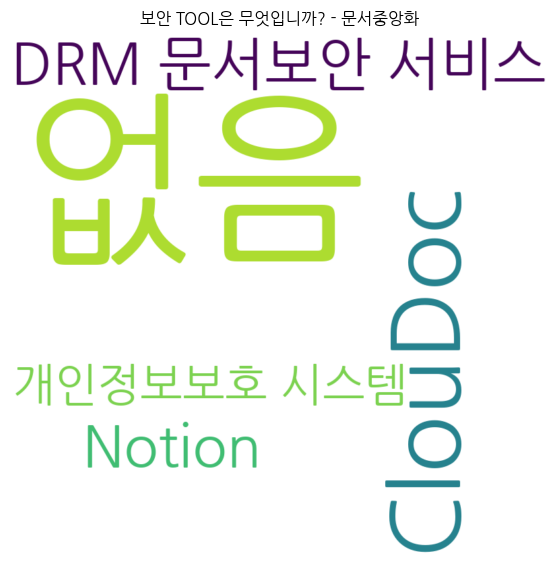

In [ ]:
get_wordcloud(q10_4, name, regex)

# Q11 비대면근무 지원 TOOL은 무엇입니까?

In [ ]:
question.filter(regex="Q11")[0].split(" - ")[0]

<ipython-input-74-a758b3b2a4eb>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  question.filter(regex="Q11")[0].split(" - ")[0]


'비대면근무 지원 TOOL은 무엇입니까?'

In [ ]:
question_11 =  question.filter(regex="Q11")
Q11 = []

for i in range(len(question_11)) :
  Q11.append(question_11[i].split(" - ")[1])

Q11

<ipython-input-75-0a6319d0f4da>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q11.append(question_11[i].split(" - ")[1])


['비대면환경 근태관리', '원격접속', '가상화PC']

In [ ]:
answer_Q11 = answer.filter(regex="Q11")

answer_Q11.columns = Q11
answer_Q11

비대면환경 근태관리          원격접속 가상화PC
1   NAVER WORKS       A-SONIC    없음
2          이카운트            없음    없음
3         다우오피스            없음    없음
4            없음            없음    없음
5            없음            사용    없음
..          ...           ...   ...
58          줌회의            없음    없음
59           없음  QuickConnect    없음
60     Telegram            없음    없음
61           없음    TeamViewer    없음
62           없음            없음    없음

[62 rows x 3 columns]

In [ ]:
answer_Q11_desc = answer_Q11.describe()
answer_Q11_desc

비대면환경 근태관리 원격접속 가상화PC
count          62   62    62
unique         14    8     2
top            없음   없음    없음
freq           40   47    61

In [ ]:
get_multiple_answer_by_qno("Q11")

freq
top     
없음    61
없음    47
없음    40

<ipython-input-79-683b4db440a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = Q11_answer_table, y = "freq", x = Q11_answer_table.index,
<ipython-input-79-683b4db440a5>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title(question.filter(regex = "Q11")[0].split("-")[0])


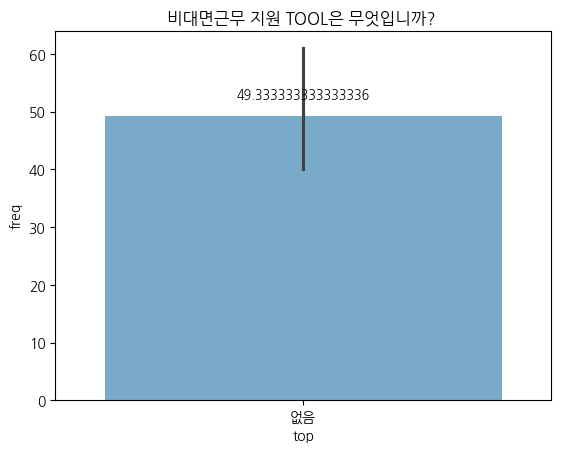

In [ ]:
Q11_answer_table = get_multiple_answer_by_qno("Q11")

ax = sns.barplot(data = Q11_answer_table, y = "freq", x = Q11_answer_table.index,
            palette = "Blues_r")
ax.set_title(question.filter(regex = "Q11")[0].split("-")[0])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

plt.show()

비대면근무 지원 TOOL은 무엇입니까? - 비대면환경 근태관리

In [ ]:
regex = "Q11"
name = (question.filter(regex = regex))[0]
name = name.split(" - ")[1]
print(name)

비대면환경 근태관리


<ipython-input-80-c5128381a807>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = (question.filter(regex = regex))[0]


<ipython-input-7-b4c77ad56257>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = qno, y = qno[name], x = "count",
<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


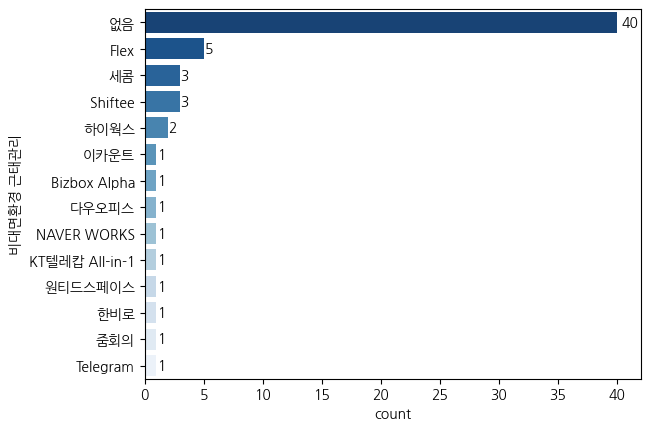

In [ ]:
q11_1 = answer_Q11[name].value_counts().reset_index()

get_bar_graph(q11_1, name, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


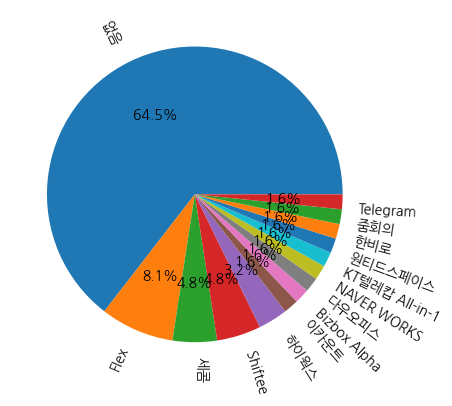

In [ ]:
answerQuestion = answer_Q11

q11_1 = answer_Q11[name].value_counts()

get_pie_graph(q11_1, name, answerQuestion, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


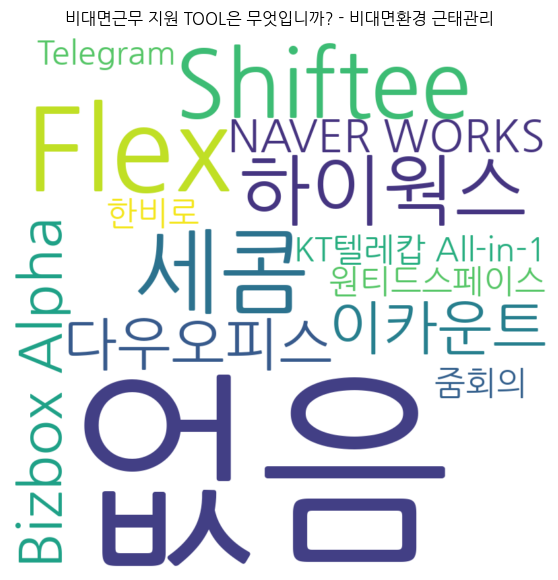

In [ ]:
get_wordcloud(q11_1, name, regex)

In [ ]:
regex = "Q11"
name = (question.filter(regex = regex))[1]
name = name.split(" - ")[1]
print(name)

원격접속


<ipython-input-84-e1185cda11e9>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = (question.filter(regex = regex))[1]


<ipython-input-7-b4c77ad56257>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = qno, y = qno[name], x = "count",
<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


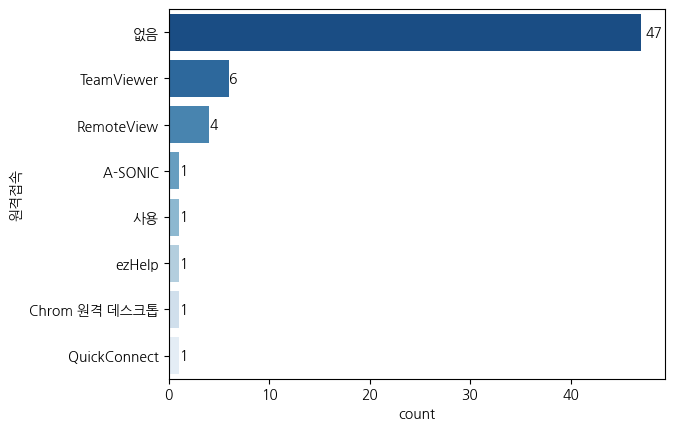

In [ ]:
q11_2 = answer_Q11[name].value_counts().reset_index()

get_bar_graph(q11_2, name, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


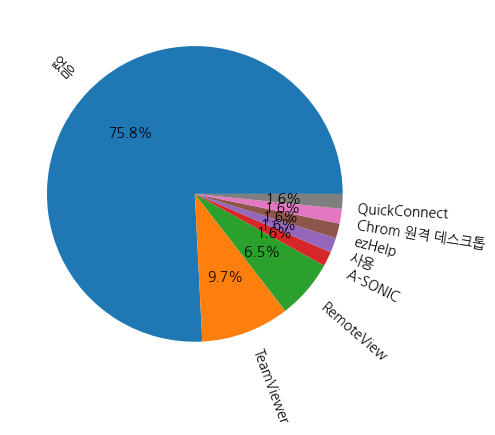

In [ ]:
answerQuestion = answer_Q11

q11_2 = answer_Q11[name].value_counts()

get_pie_graph(q11_2, name, answerQuestion, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


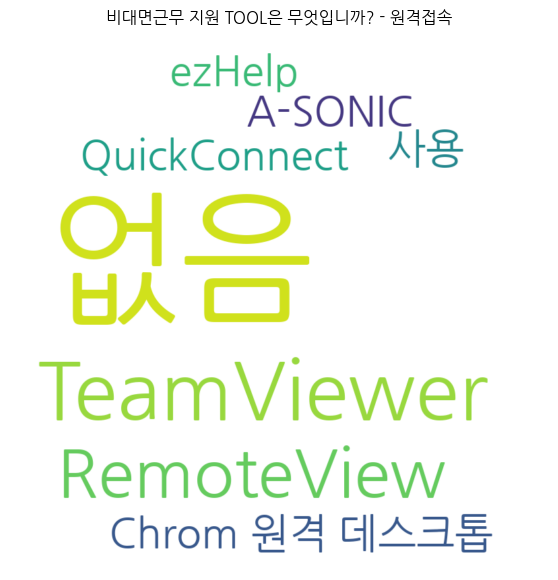

In [ ]:
get_wordcloud(q11_2, name, regex)

비대면근무 지원 TOOL은 무엇입니까? - 가상화PC

In [ ]:
regex = "Q11"
name = (question.filter(regex = regex))[2]
name = name.split(" - ")[1]
print(name)

가상화PC


<ipython-input-88-b147b073120e>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = (question.filter(regex = regex))[2]


<ipython-input-7-b4c77ad56257>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = qno, y = qno[name], x = "count",
<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


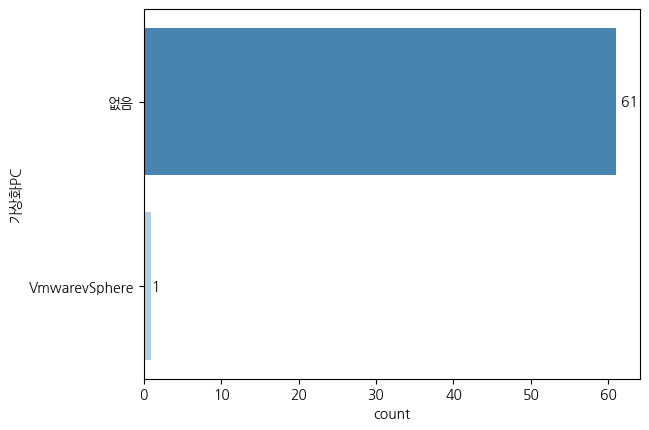

In [ ]:
q11_3 = answer_Q11[name].value_counts().reset_index()

get_bar_graph(q11_3, name, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


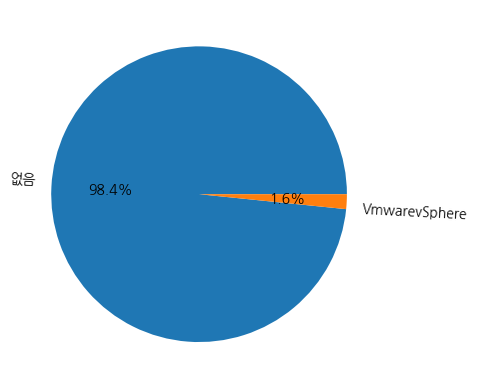

In [ ]:
answerQuestion = answer_Q11

q11_3 = answer_Q11[name].value_counts()

get_pie_graph(q11_3, name, answerQuestion, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


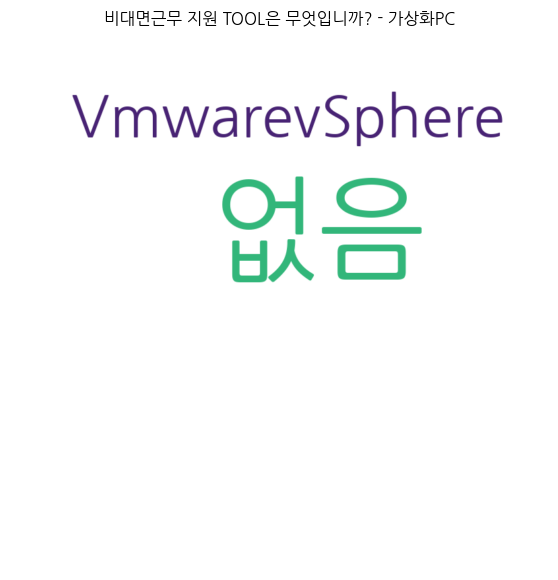

In [ ]:
get_wordcloud(q11_3, name, regex)

#Q12 기타 업무용 TOOL은 무엇입니까?

In [ ]:
question.filter(regex="Q12")[0].split(" - ")[0]

<ipython-input-92-228ffe562e62>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  question.filter(regex="Q12")[0].split(" - ")[0]


'기타 업무용 TOOL은 무엇입니까?'

In [ ]:
question_12 =  question.filter(regex="Q12")
Q12 = []

for i in range(len(question_12)) :
  Q12.append(question_12[i].split(" - ")[1])

Q12

<ipython-input-93-119e6f5501e5>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q12.append(question_12[i].split(" - ")[1])


['ERP', 'CRM']

In [ ]:
answer_Q12 = answer.filter(regex="Q12")

answer_Q12.columns = Q12
answer_Q12

ERP    CRM
1   자체 ERP 솔루션     없음
2         이카운트     없음
3       WEHAGO     없음
4           없음     없음
5         이카운트     없음
..         ...    ...
58        G-포털     없음
59        이카운트     없음
60      Paygle     없음
61          더존     없음
62       미주아이티  미주아이티

[62 rows x 2 columns]

In [ ]:
answer_Q12_desc = answer_Q12.describe()
answer_Q12_desc

ERP CRM
count   62  62
unique  14   6
top     없음  없음
freq    28  56

In [ ]:
get_multiple_answer_by_qno("Q12")

freq
top     
없음    56
없음    28

<ipython-input-97-081d16399c0c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = Q12_answer_table, y = "freq", x = Q12_answer_table.index,
<ipython-input-97-081d16399c0c>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title(question.filter(regex = "Q12")[0].split("-")[0])


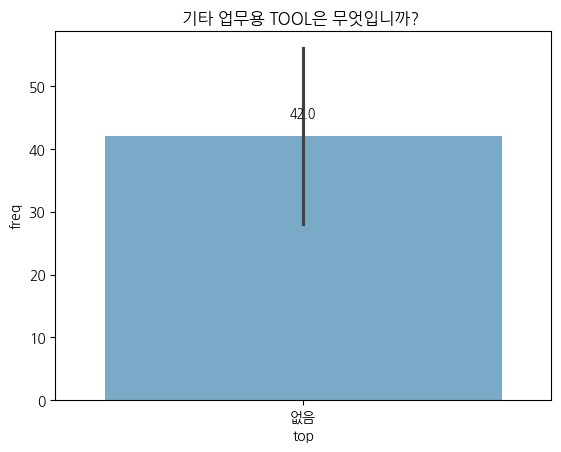

In [ ]:
Q12_answer_table = get_multiple_answer_by_qno("Q12")

ax = sns.barplot(data = Q12_answer_table, y = "freq", x = Q12_answer_table.index,
            palette = "Blues_r")
ax.set_title(question.filter(regex = "Q12")[0].split("-")[0])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

plt.show()

기타 업무용 TOOL은 무엇입니까? - ERP

In [ ]:
regex = "Q12"
name = (question.filter(regex = regex))[0]
name = name.split(" - ")[1]
print(name)

ERP


<ipython-input-98-7546136d1f6b>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = (question.filter(regex = regex))[0]


<ipython-input-7-b4c77ad56257>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = qno, y = qno[name], x = "count",
<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


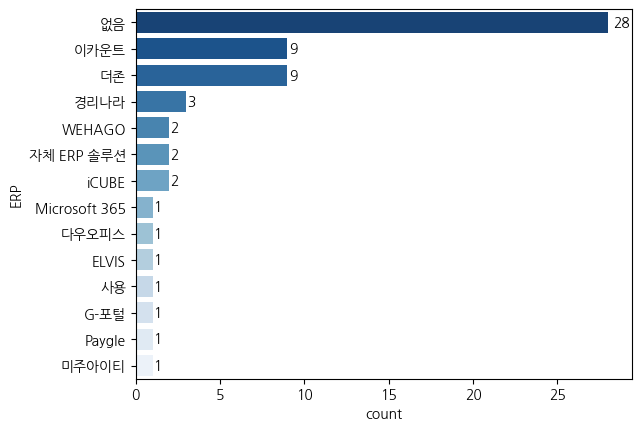

In [ ]:
q12_1 = answer_Q12[name].value_counts().reset_index()

get_bar_graph(q12_1, name, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


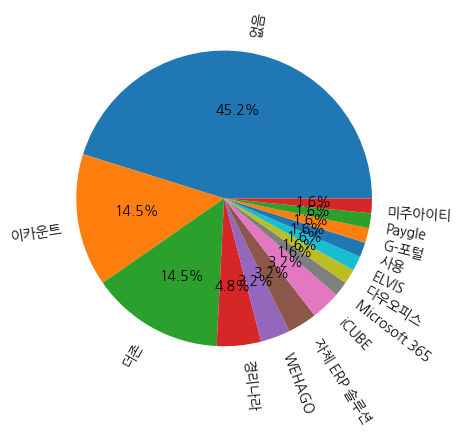

In [ ]:
answerQuestion = answer_Q12

q12_1 = answer_Q12[name].value_counts()

get_pie_graph(q12_1, name, answerQuestion, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


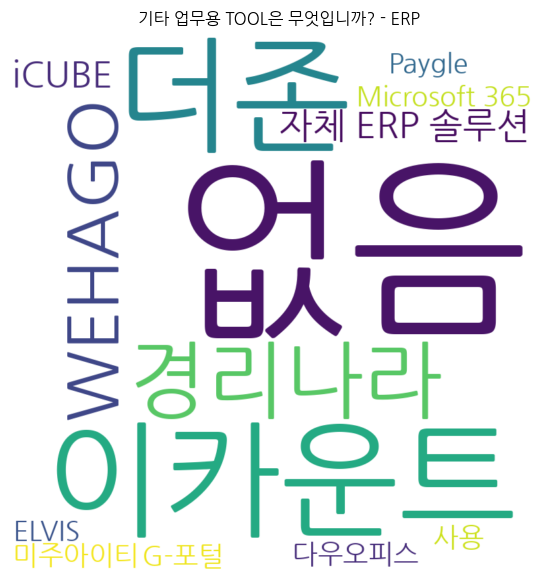

In [ ]:
get_wordcloud(q12_1, name, regex)

기타 업무용 TOOL은 무엇입니까? - CRM

In [ ]:
regex = "Q12"
name = (question.filter(regex = regex))[1]
name = name.split(" - ")[1]
print(name)

CRM


<ipython-input-102-5d96cfd93e78>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = (question.filter(regex = regex))[1]


<ipython-input-7-b4c77ad56257>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = qno, y = qno[name], x = "count",
<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


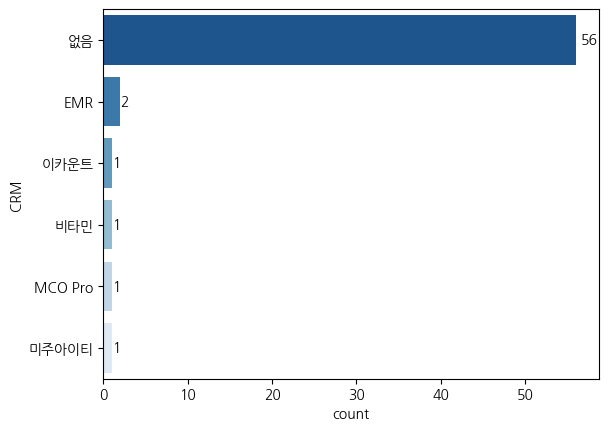

In [ ]:
q12_2 = answer_Q12[name].value_counts().reset_index()

get_bar_graph(q12_2, name, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


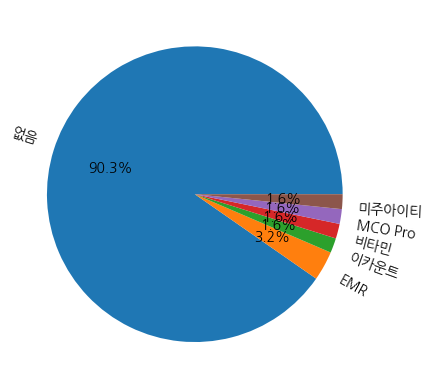

In [ ]:
answerQuestion = answer_Q12

q12_2 = answer_Q12[name].value_counts()

get_pie_graph(q12_2, name, answerQuestion, regex)

<ipython-input-7-b4c77ad56257>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if title[i].split(" - ")[1] == name :
<ipython-input-7-b4c77ad56257>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return title[i]


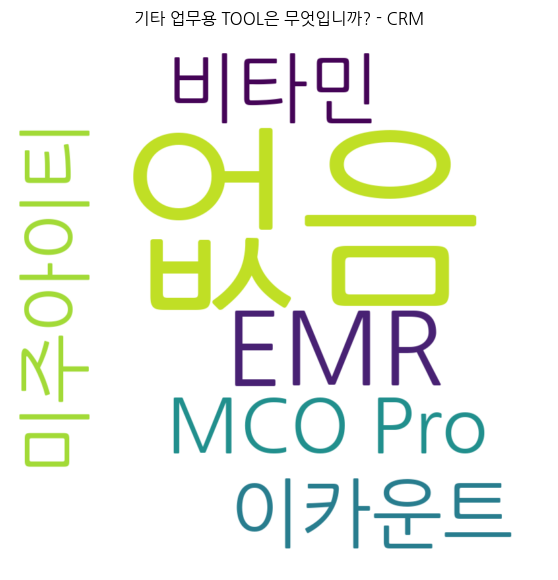

In [ ]:
get_wordcloud(q12_2, name, regex)

# Q13 업무 수행을 위해 사용하는 IT S/W 시스템 중 추가적으로 도입이 필요하거나 보완이 필요한 시스템(그룹웨어, 화상회의, 협업툴, 근태관리, 문서중앙화, 메신저 등)은 무엇입니까?

In [ ]:
answer_Q13 = answer.filter(regex="Q13")

answer_Q13


Q13_1 Q13_2 Q13_3 Q13_4       Q13_5 Q13_6 Q13_7 Q13_8 Q13_9
1    NaN   NaN   NaN  근태관리         NaN   NaN   NaN   NaN   NaN
2   그룹웨어   NaN   NaN   NaN  보안 및 문서중앙화   NaN   NaN   NaN   NaN
3   그룹웨어   NaN   협업툴  근태관리  보안 및 문서중앙화   NaN   NaN   NaN   NaN
4   그룹웨어   NaN   협업툴  근태관리         NaN   NaN   NaN   NaN   NaN
5    NaN   NaN   NaN  근태관리         NaN   NaN   NaN   NaN   NaN
..   ...   ...   ...   ...         ...   ...   ...   ...   ...
58   NaN   NaN   NaN  근태관리         NaN   NaN   NaN   NaN   NaN
59  그룹웨어   NaN   NaN  근태관리         NaN   메신저   NaN   NaN   NaN
60   NaN   NaN   NaN  근태관리         NaN   NaN   NaN   NaN   NaN
61   NaN  화상회의   NaN   NaN  보안 및 문서중앙화   NaN   NaN   NaN   NaN
62   NaN   NaN   NaN  근태관리         NaN   NaN   NaN   NaN   NaN

[62 rows x 9 columns]

In [ ]:
answer_Q13_sum = answer_Q13.notnull().sum()
answer_Q13_sum


Q13_1    21
Q13_2     9
Q13_3    14
Q13_4    31
Q13_5    26
Q13_6    11
Q13_7    22
Q13_8     6
Q13_9     4
dtype: int64

In [ ]:
answer_Q13_desc = answer_Q13.describe()
answer_Q13_desc

Q13_1 Q13_2 Q13_3 Q13_4       Q13_5 Q13_6 Q13_7 Q13_8   Q13_9
count     21     9    14    31          26    11    22     6       4
unique     1     1     1     1           1     1     1     1       1
top     그룹웨어  화상회의   협업툴  근태관리  보안 및 문서중앙화   메신저    기타    없음  잘 모르겠다
freq      21     9    14    31          26    11    22     6       4

In [ ]:
# answer_Q13_desc.loc[["top", "count"]].T.set_index("top")
get_multiple_answer_by_qno("Q13")

freq
top            
근태관리         31
보안 및 문서중앙화   26
기타           22
그룹웨어         21
협업툴          14
메신저          11
화상회의          9
없음            6
잘 모르겠다        4

<ipython-input-110-1a744908edbc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = Q13_answer_table, y = Q13_answer_table.index, x = "freq",


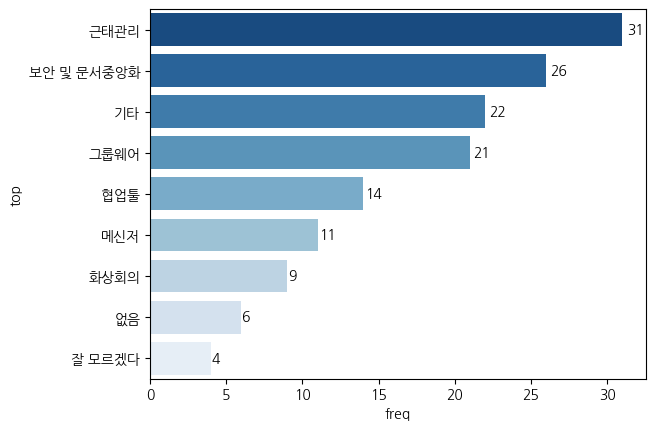

In [ ]:
Q13_answer_table = get_multiple_answer_by_qno("Q13")

ax = sns.barplot(data = Q13_answer_table, y = Q13_answer_table.index, x = "freq",
            palette = "Blues_r")
# ax.set_title(question.filter(regex = "Q13")[0].split("-")[0])

Q13_answer_table = Q13_answer_table.reset_index()

for i, p in enumerate(ax.patches): # loop through patches and their index
  x, y, width, height = p.get_bbox().bounds
  ax.text(width*1.01, y+height/2, Q13_answer_table.loc[i,'freq'], va='center') # access count using index

plt.show()


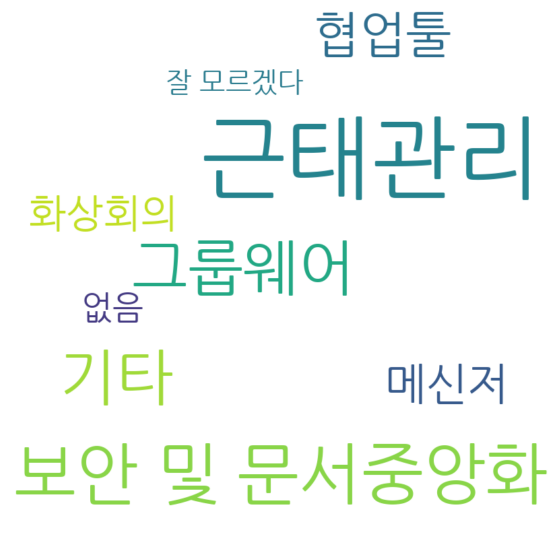

In [ ]:
Q13_dict = Q13_answer_table.to_dict()["freq"]

Q13_answer_table = Q13_answer_table.reset_index()

Q13_dict = dict(zip(Q13_answer_table['top'], Q13_answer_table['freq']))


wordcloud = WordCloud(
    font_path = "NanumGothic",
    background_color = "white",
    width = 800,
    height = 800
).generate_from_frequencies(Q13_dict)
plt.figure(figsize = (7, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Q15 비대면 근무(재택/원격 근무) 솔루션 도입에 있어, 가장 우려되는 부분 2가지를 선택하여 주십시오.

In [ ]:
answer_Q15 = answer.filter(regex="Q15")

answer_Q15


Q15_1   Q15_2             Q15_3 Q15_4         Q15_5 Q15_6
1   경제적 비용 부담  호환성 부족               NaN   NaN           NaN   NaN
2   경제적 비용 부담     NaN  정보유출 등 보안에 대한 우려   NaN           NaN   NaN
3   경제적 비용 부담     NaN  정보유출 등 보안에 대한 우려   NaN           NaN   NaN
4   경제적 비용 부담     NaN  정보유출 등 보안에 대한 우려   NaN           NaN   NaN
5         NaN  호환성 부족  정보유출 등 보안에 대한 우려   NaN           NaN   NaN
..        ...     ...               ...   ...           ...   ...
58        NaN  호환성 부족  정보유출 등 보안에 대한 우려   NaN           NaN   NaN
59        NaN  호환성 부족  정보유출 등 보안에 대한 우려   NaN           NaN   NaN
60  경제적 비용 부담  호환성 부족               NaN   NaN           NaN   NaN
61  경제적 비용 부담     NaN  정보유출 등 보안에 대한 우려   NaN           NaN   NaN
62  경제적 비용 부담     NaN               NaN   NaN  서비스(기술)의 복잡성   NaN

[62 rows x 6 columns]

In [ ]:
answer_Q15_sum = answer_Q15.notnull().sum()
answer_Q15_sum

Q15_1    38
Q15_2    13
Q15_3    29
Q15_4    19
Q15_5    13
Q15_6    11
dtype: int64

In [ ]:
answer_Q15_desc = answer_Q15.describe()
answer_Q15_desc

Q15_1   Q15_2             Q15_3      Q15_4         Q15_5 Q15_6
count          38      13                29         19            13    11
unique          1       1                 1          1             1     1
top     경제적 비용 부담  호환성 부족  정보유출 등 보안에 대한 우려  조직의 역량 부족  서비스(기술)의 복잡성    기타
freq           38      13                29         19            13    11

In [ ]:
get_multiple_answer_by_qno("Q15")

freq
top                  
경제적 비용 부담          38
정보유출 등 보안에 대한 우려   29
조직의 역량 부족          19
호환성 부족             13
서비스(기술)의 복잡성       13
기타                 11

<ipython-input-116-2927f2035a7d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = Q15_answer_table, y = Q15_answer_table.index, x = "freq",
<ipython-input-116-2927f2035a7d>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title( question.filter(regex = "Q15")[0].split("-")[0])


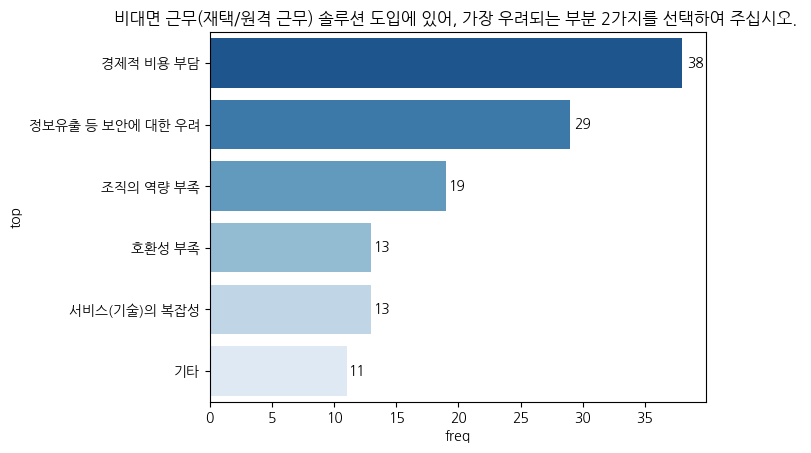

In [ ]:
Q15_answer_table = get_multiple_answer_by_qno("Q15")

ax = sns.barplot(data = Q15_answer_table, y = Q15_answer_table.index, x = "freq",
            palette = "Blues_r")
ax.set_title( question.filter(regex = "Q15")[0].split("-")[0])

Q15_answer_table = Q15_answer_table.reset_index()

for i, p in enumerate(ax.patches): # loop through patches and their index
  x, y, width, height = p.get_bbox().bounds
  ax.text(width*1.01, y+height/2, Q15_answer_table.loc[i,'freq'], va='center') # access count using index

plt.show()


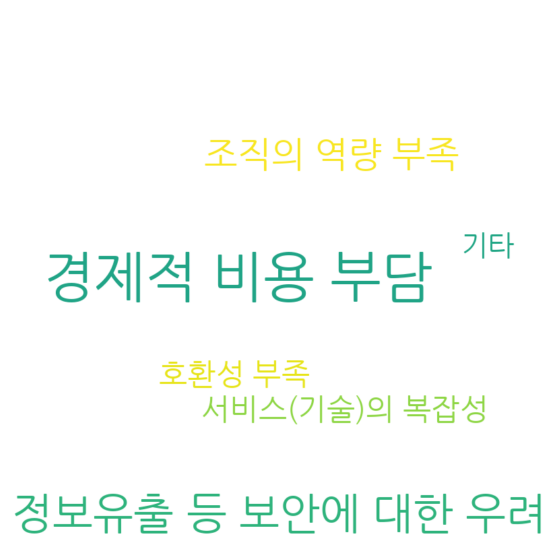

In [ ]:
Q15_dict = Q15_answer_table.to_dict()["freq"]

Q15_answer_table = Q15_answer_table.reset_index()

Q15_dict = dict(zip(Q15_answer_table['top'], Q15_answer_table['freq']))


wordcloud = WordCloud(
    font_path = "NanumGothic",
    background_color = "white",
    width = 800,
    height = 800
).generate_from_frequencies(Q15_dict)
plt.figure(figsize = (7, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# 정보유출 우려가 있는 기업 (Q15_3) -> 사내망 구축여부 (Q14)

In [ ]:
Qsecure = answer[["Q15_3", "Q14"]]
Qs = Qsecure.loc[Qsecure["Q15_3"].notnull()]
Qs
Qsecure.value_counts()

Q15_3             Q14
정보유출 등 보안에 대한 우려  아니오    21
                  예       8
Name: count, dtype: int64

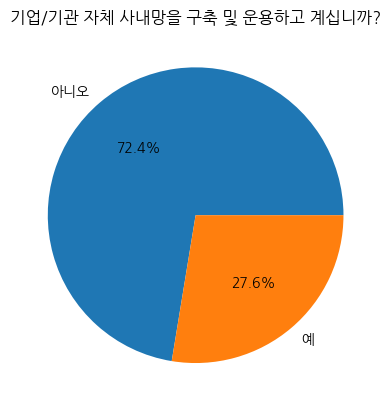

In [ ]:
plt.pie(Qs.value_counts(), labels=answer["Q14"].value_counts().index, autopct='%1.1f%%')
plt.title(question["Q14"])
plt.show()

# Q19 [화상회의] 가장 필요한 기능의 순서대로 선택해주십시오.

In [ ]:
answer_Q19 = answer.filter(regex="Q19")

# print(answer_Q19)

answer_Q19P = answer_P.filter(regex="Q19")

# print(answer_Q19P)


In [ ]:
answer_Q19P_desc = answer_Q19P.describe()
answer_Q19P_desc

Q19_1  Q19_2  Q19_3  Q19_4  Q19_5  Q19_6
count      62     62     62     62     62     62
unique      6      6      6      6      6      6
top         1      2      5      4      6      5
freq       32     18     14     23     23     14

In [ ]:
answer_Q19P.sum()

Q19_1    140
Q19_2    210
Q19_3    243
Q19_4    189
Q19_5    289
Q19_6    231
dtype: object

                       기능 응답 가중치 합
4            회의록 작성 보조 기능      289
2    회의 중 소그룹 지정 및 채팅방 기능      243
5   고화질, 낮은 딜레이 등 화상회의 품질      231
1         참여자 대상 투표/설문 기능      210
3      게스트 임시 계정 발급/초대 기능      189
0   30인 이상 대규모 동시 화상회의 기능      140


<ipython-input-123-d6ce61c7645d>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_index.append(question_P.filter(regex="Q19")[i].split("-")[1])
<ipython-input-123-d6ce61c7645d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = Q19_answer_table.reset_index(), y = '기능', x = '응답 가중치 합',
<ipython-input-123-d6ce61c7645d>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title( question.filter(regex = "Q19")[0].split("-")[0])


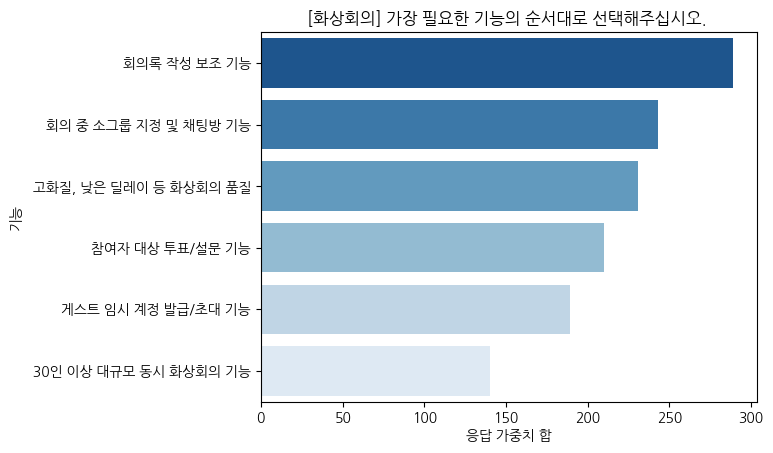

In [ ]:
Q19_answer_table = answer_Q19P.sum().reset_index()

new_index = []
for i in range(len(Q19_answer_table)):
  new_index.append(question_P.filter(regex="Q19")[i].split("-")[1])
# Assign the new index to the DataFrame
Q19_answer_table["index"] = new_index

Q19_answer_table.columns = ['기능', '응답 가중치 합']
Q19_answer_table = Q19_answer_table.sort_values(by='응답 가중치 합', ascending=False)





print(Q19_answer_table)

ax = sns.barplot(data = Q19_answer_table.reset_index(), y = '기능', x = '응답 가중치 합',
            palette = "Blues_r")
ax.set_title( question.filter(regex = "Q19")[0].split("-")[0])


plt.show()

<ipython-input-124-5acb30691a94>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(question.filter(regex = "Q19")[0].split("-")[0])


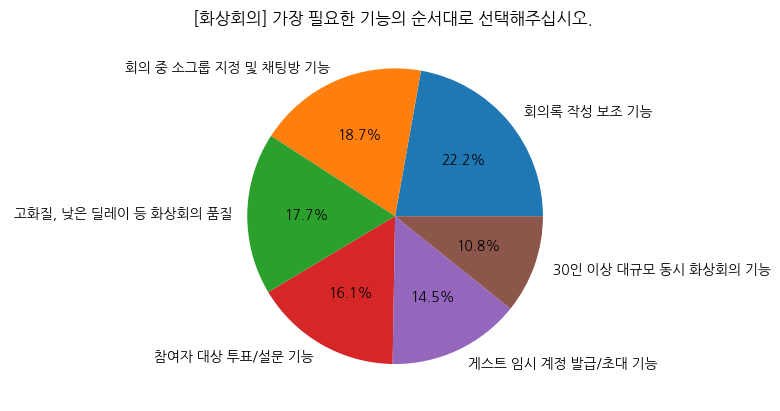

In [ ]:


plt.pie(Q19_answer_table["응답 가중치 합"], labels=Q19_answer_table["기능"], autopct='%1.1f%%', rotatelabels=False)
plt.title(question.filter(regex = "Q19")[0].split("-")[0])


plt.show()


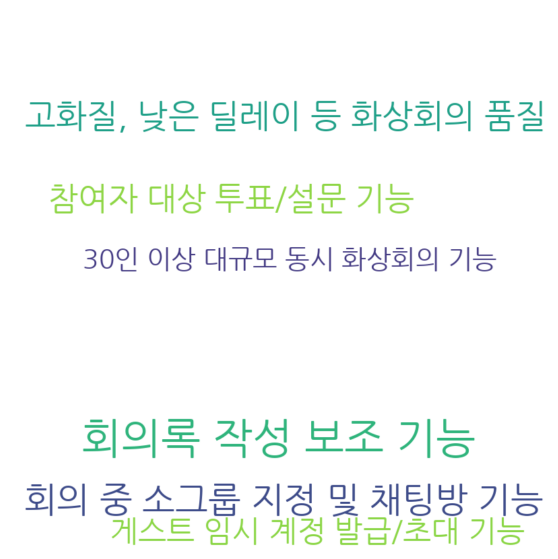

In [ ]:
wordcloud = WordCloud(
    font_path="NanumGothic",
    background_color="white",
    width=800,
    height=800
).generate_from_frequencies(Q19_answer_table.set_index('기능')['응답 가중치 합'].to_dict())  # Convert to dictionary with string keys and numeric values
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Q23 [협업툴] 가장 필요한 기능의 순서대로 선택해주십시오.

In [ ]:
answer_Q23 = answer.filter(regex="Q23")

# print(answer_Q23)

answer_Q23P = answer_P.filter(regex="Q23")

# print(answer_Q23P)


<ipython-input-127-f5605e2f8d66>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_index.append(question_P.filter(regex="Q23")[i].split("-")[1])
<ipython-input-127-f5605e2f8d66>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = Q23_answer_table.reset_index(), y = '기능', x = '응답 가중치 합',
<ipython-input-127-f5605e2f8d66>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title( question.filter(regex = "Q23")[0].split("-")[0])


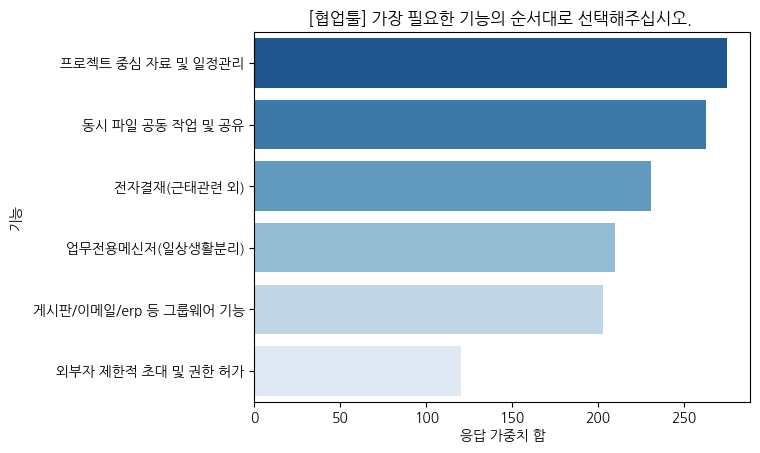

In [ ]:
Q23_answer_table = answer_Q23P.sum().reset_index()

new_index = []
for i in range(len(Q23_answer_table)):
  new_index.append(question_P.filter(regex="Q23")[i].split("-")[1])
# Assign the new index to the DataFrame
Q23_answer_table["index"] = new_index

Q23_answer_table.columns = ['기능', '응답 가중치 합']
Q23_answer_table = Q23_answer_table.sort_values(by='응답 가중치 합', ascending=False)





# print(Q23_answer_table)

ax = sns.barplot(data = Q23_answer_table.reset_index(), y = '기능', x = '응답 가중치 합',
            palette = "Blues_r")
ax.set_title( question.filter(regex = "Q23")[0].split("-")[0])


plt.show()

<ipython-input-128-70c24b5ae956>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(question.filter(regex = "Q23")[0].split("-")[0])


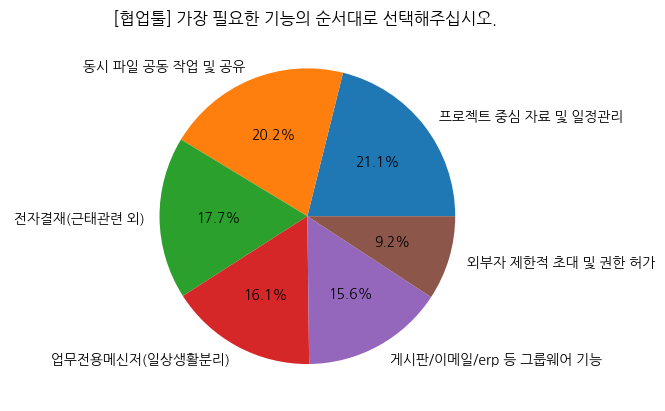

In [ ]:
plt.pie(Q23_answer_table["응답 가중치 합"], labels=Q23_answer_table["기능"], autopct='%1.1f%%', rotatelabels=False)
plt.title(question.filter(regex = "Q23")[0].split("-")[0])

plt.show()

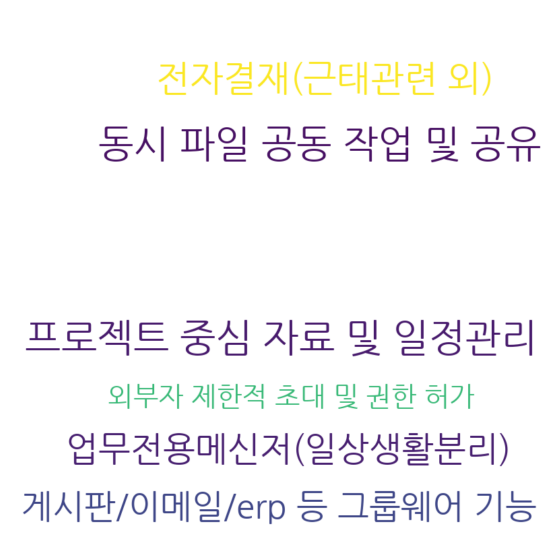

In [ ]:
wordcloud = WordCloud(
    font_path="NanumGothic",
    background_color="white",
    width=800,
    height=800
).generate_from_frequencies(Q23_answer_table.set_index('기능')['응답 가중치 합'].to_dict())  # Convert to dictionary with string keys and numeric values
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Q27 [보안] 가장 필요한 기능의 순서대로 선택해주십시오.

In [ ]:
answer_Q27 = answer.filter(regex="Q27")

answer_Q27P = answer_P.filter(regex="Q27")


<ipython-input-131-95f10422112c>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_index.append(question_P.filter(regex="Q27")[i].split("-")[1])
<ipython-input-131-95f10422112c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = Q27_answer_table.reset_index(), y = '기능', x = '응답 가중치 합',
<ipython-input-131-95f10422112c>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title( question.filter(regex = "Q27")[0].split("-")[0])


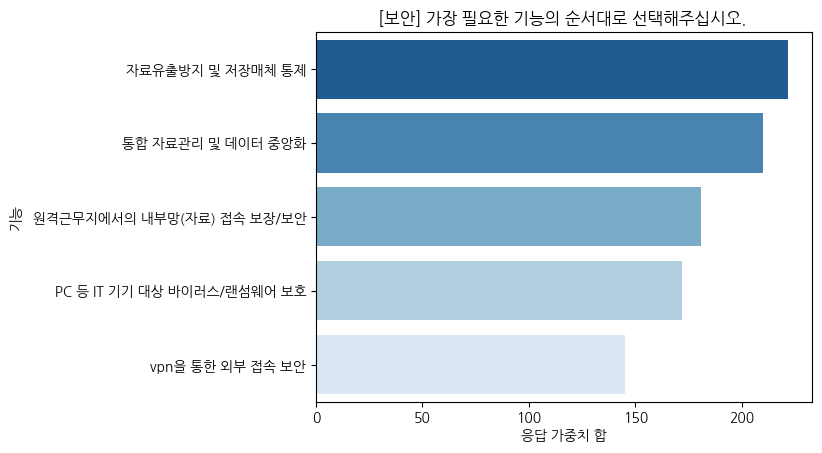

In [ ]:
Q27_answer_table = answer_Q27P.sum().reset_index()

new_index = []
for i in range(len(Q27_answer_table)):
  new_index.append(question_P.filter(regex="Q27")[i].split("-")[1])
# Assign the new index to the DataFrame
Q27_answer_table["index"] = new_index

Q27_answer_table.columns = ['기능', '응답 가중치 합']
Q27_answer_table = Q27_answer_table.sort_values(by='응답 가중치 합', ascending=False)



ax = sns.barplot(data = Q27_answer_table.reset_index(), y = '기능', x = '응답 가중치 합',
            palette = "Blues_r")
ax.set_title( question.filter(regex = "Q27")[0].split("-")[0])


plt.show()

<ipython-input-132-4d91949e3fbb>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(question.filter(regex = "Q27")[0].split("-")[0])


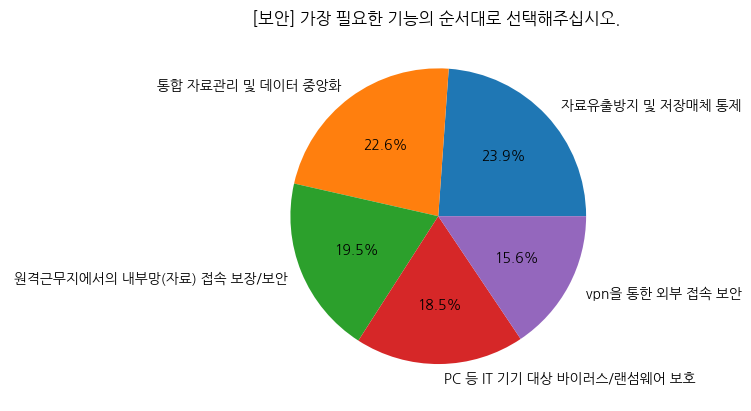

In [ ]:
plt.pie(Q27_answer_table["응답 가중치 합"], labels=Q27_answer_table["기능"], autopct='%1.1f%%', rotatelabels=False)
plt.title(question.filter(regex = "Q27")[0].split("-")[0])

plt.show()

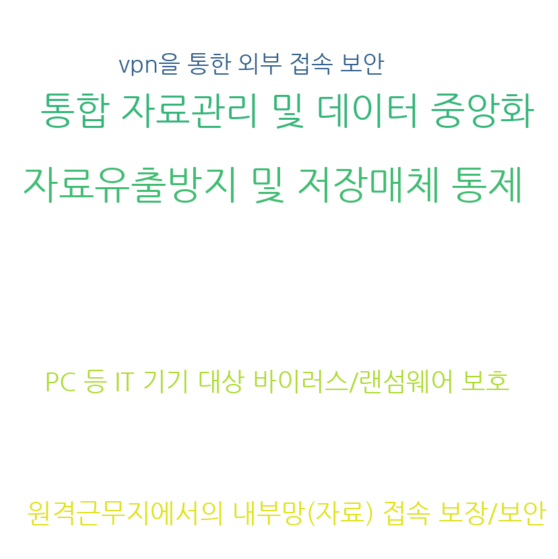

In [ ]:
wordcloud = WordCloud(
    font_path="NanumGothic",
    background_color="white",
    width=800,
    height=800
).generate_from_frequencies(Q27_answer_table.set_index('기능')['응답 가중치 합'].to_dict())  # Convert to dictionary with string keys and numeric values
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Q31 [근태관리] 가장 필요한 기능의 순서대로 선택해주십시오.

In [ ]:
answer_Q31 = answer.filter(regex="Q31")

answer_Q31P = answer_P.filter(regex="Q31")


<ipython-input-135-57b344261250>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_index.append(question_P.filter(regex="Q31")[i].split("-")[1])
<ipython-input-135-57b344261250>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = Q31_answer_table.reset_index(), y = '기능', x = '응답 가중치 합',
<ipython-input-135-57b344261250>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title( question.filter(regex = "Q31")[0].split("-")[0])


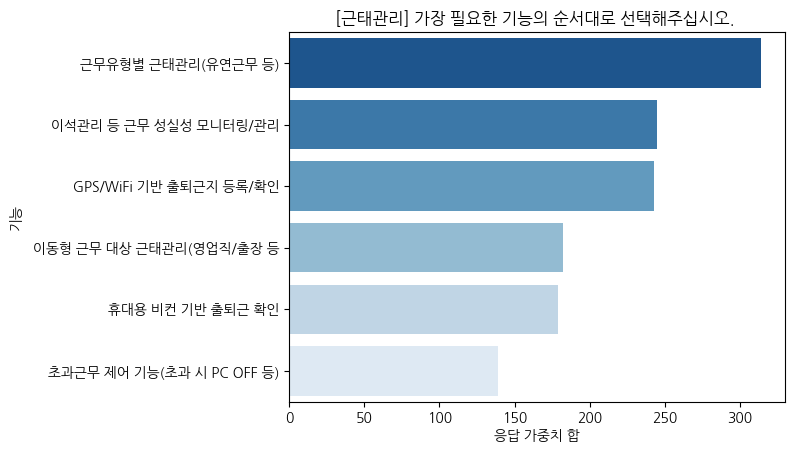

In [ ]:
Q31_answer_table = answer_Q31P.sum().reset_index()

new_index = []
for i in range(len(Q31_answer_table)):
  new_index.append(question_P.filter(regex="Q31")[i].split("-")[1])
# Assign the new index to the DataFrame
Q31_answer_table["index"] = new_index

Q31_answer_table.columns = ['기능', '응답 가중치 합']
Q31_answer_table = Q31_answer_table.sort_values(by='응답 가중치 합', ascending=False)



ax = sns.barplot(data = Q31_answer_table.reset_index(), y = '기능', x = '응답 가중치 합',
            palette = "Blues_r")
ax.set_title( question.filter(regex = "Q31")[0].split("-")[0])


plt.show()

<ipython-input-136-1c5b947c4a19>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(question.filter(regex = "Q31")[0].split("-")[0])


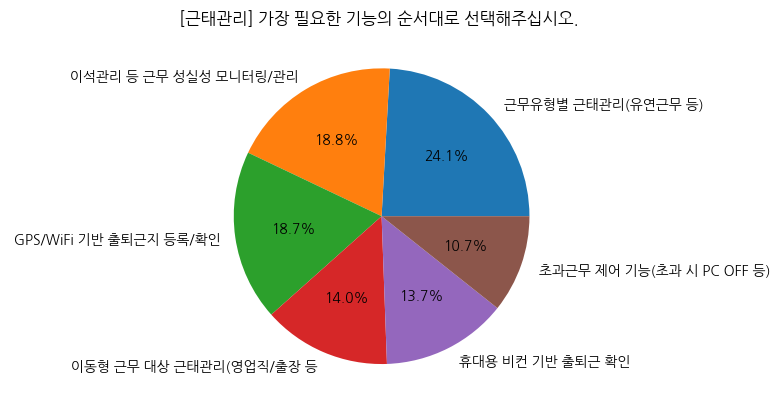

In [ ]:
plt.pie(Q31_answer_table["응답 가중치 합"], labels=Q31_answer_table["기능"], autopct='%1.1f%%', rotatelabels=False)
plt.title(question.filter(regex = "Q31")[0].split("-")[0])

plt.show()

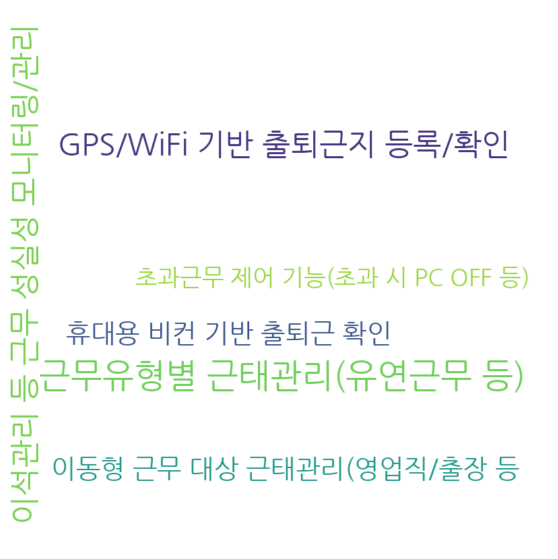

In [ ]:
wordcloud = WordCloud(
    font_path="NanumGothic",
    background_color="white",
    width=800,
    height=800
).generate_from_frequencies(Q31_answer_table.set_index('기능')['응답 가중치 합'].to_dict())  # Convert to dictionary with string keys and numeric values
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 유연근무 환경이 구축된 기업은 구성원의 IT활용 능력이 긍정적일 것이다.(x)


In [ ]:
H1 = pd.read_excel("/content/gdrive/MyDrive/flexible_work.xlsx", sheet_name="가설1")

Q8 = H1["Q8"].drop(0)
Q9 = H1.filter(regex="Q9").drop(0)
Q10 = H1.filter(regex="Q10").drop(0)
Q11 = H1.filter(regex="Q11").drop(0)
Q12 = H1.filter(regex="Q12").drop(0)

Q9avg = Q9.iloc[ : , -1]
Q10avg = Q10.iloc[ : , -1]
Q11avg = Q11.iloc[ : , -1]
Q12avg = Q12.iloc[ : , -1]

H1_table = pd.concat([Q8, Q9avg, Q10avg, Q11avg, Q12avg], axis=1)

In [ ]:
corr = H1_table.corr()
corr


Q8      Q9_8     Q10_5     Q11_4     Q12_3
Q8     1.000000  0.072110 -0.087475  0.151597  0.091532
Q9_8   0.072110  1.000000  0.267023  0.239204  0.226990
Q10_5 -0.087475  0.267023  1.000000  0.311011  0.156080
Q11_4  0.151597  0.239204  0.311011  1.000000  0.191472
Q12_3  0.091532  0.226990  0.156080  0.191472  1.000000

                            OLS Regression Results                            
Dep. Variable:                     Q8   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.7863
Date:                Tue, 22 Apr 2025   Prob (F-statistic):              0.539
Time:                        04:03:06   Log-Likelihood:                -84.966
No. Observations:                  62   AIC:                             179.9
Df Residuals:                      57   BIC:                             190.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0214      0.316      9.564      0.0

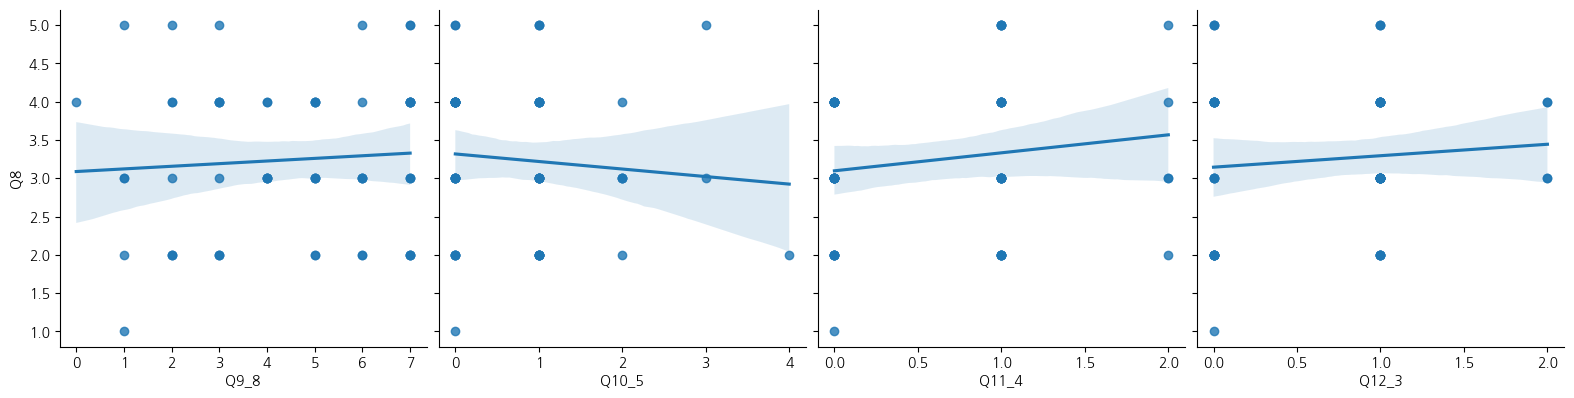

In [ ]:
#다중회귀분석
H1_table = H1_table.apply(pd.to_numeric, errors='coerce')

model2 = smf.ols(formula="Q8 ~ Q9_8 + Q10_5 + Q11_4 + Q12_3", data = H1_table)
result2 = model2.fit()

print(result2.summary())

#독립변수
X = H1_table[["Q9_8", "Q10_5", "Q11_4", "Q12_3"]]

#종속변수
y = H1_table["Q8"]
X = sm.add_constant(X)

sns.pairplot(H1_table, x_vars=["Q9_8", "Q10_5", "Q11_4", "Q12_3"], y_vars="Q8", height=4, aspect=1, kind='reg')

plt.show()

# 구성원이 IT활용에 능숙하면 유연근무 정착에 긍정적일 것이다.(o)

In [ ]:
print(f'Q8  : {question_P["Q8"]}')
print(f'Q17 : {question_P["Q17"]}')
print(f'Q18 : {question_P["Q18"]}')
print(f'Q21 : {question_P["Q21"]}')
print(f'Q26 : {question_P["Q26"]}')
print(f'Q28 : {question_P["Q28"]}')
print(f'Q29 : {question_P["Q29"]}')
print(f'Q30 : {question_P["Q30"]}')
# print(f'Q32 : {question_P["Q32"]}')

Q8  : 구성원이 일반 사무 외에도 컴퓨터 및 소프트웨어 활용 전반에 능숙합니까?
Q17 : [화상회의] 비대면 근무 시, 대면회의 및 일반적인 논의를 화상회의로 대체할 의향이 있으십니까?
Q18 : [화상회의] 일반 사무실 근무 시, 회의실을 활용한 대면회의가 아닌 화상회의를 활용할 의향이 있으십니까?
Q21 : [협업툴] 비대면 근무 시, 업무 상 의사소통과 업무 관리가 더 어려워 질 것으로 우려되십니까?(혹은 지금 어려움을 겪고 계십니까?)
Q26 : [보안] 비대면 근무 상황에서 회사 업무 네트워크/자료 접근 시 별도의 보안 조치를 취하거나 보호 방안을 강구하고 계십니까?
Q28 : [근태관리] 비대면 근무 환경에서 출퇴근, 휴가 등 근태 관리에 어려움이 있습니까?
Q29 : [근태관리] 비대면 근무 환경에서 이석 관리 등 근무자의 근무 성실성 및 태도를 체계적으로 파악하는데 어려움이 예상되십니까?
Q30 : [근태관리] 근무환경 변화로 인한 구성원의 업무 생산성 감소에 대한 우려가 있습니까?


In [ ]:
answerP8 = answer_P[(answer_P["Q8"]==4) | (answer_P["Q8"]==5)]
# answerP8
answerN8 = answer_P[(answer_P["Q8"]==1) | (answer_P["Q8"]==2)]
answerM8 = answer_P[(answer_P["Q8"]==3)]


평균 Q8응답값 >= 4 인 업태의 상관관계 (구성원이 일반 사무 외에도 컴퓨터 및 소프트웨어 활용 전반에 능숙하다)

In [ ]:
# df_A = pd.read_excel("/content/gdrive/MyDrive/flexible_work.xlsx", sheet_name="Sheet13")
df_A = pd.read_excel("/content/gdrive/MyDrive/flexible_work.xlsx", sheet_name="정리4")

# corr = answer_P[["Q8", "Q17", "Q18", "Q21", "Q26", "Q28", "Q29", "Q30"]].corr()
# corr = answerP8[["Q8", "Q17", "Q18", "Q21", "Q26", "Q28", "Q29", "Q30", "Q32"]].corr()
# corr = answerP8[["Q8", "Q17", "Q18", "Q21", "Q26", "Q28", "Q29", "Q30"]].corr()
# corr
# df_A.head(3)
answer_A = df_A.drop(0)

aP8 = answer_A[(answer_A["Q8"] >= 4)]

corr = aP8[["Q8", "Q16", "Q17", "Q18", "Q20", "Q21", "Q22", "Q24", "Q25", "Q26", "Q28", "Q29", "Q30"]].corr()
corr


Q8       Q16       Q17       Q18       Q20       Q21       Q22  \
Q8   1.000000 -0.015254 -0.045447 -0.193572 -0.170901 -0.076696  0.188080   
Q16 -0.015254  1.000000  0.005199  0.333076  0.032930  0.160868  0.064553   
Q17 -0.045447  0.005199  1.000000  0.397634  0.523243  0.177185  0.149583   
Q18 -0.193572  0.333076  0.397634  1.000000  0.254902  0.130647  0.174754   
Q20 -0.170901  0.032930  0.523243  0.254902  1.000000  0.524300  0.101504   
Q21 -0.076696  0.160868  0.177185  0.130647  0.524300  1.000000  0.468815   
Q22  0.188080  0.064553  0.149583  0.174754  0.101504  0.468815  1.000000   
Q24 -0.410975  0.435989  0.018677  0.354083  0.310517  0.627541  0.316212   
Q25 -0.169516  0.422786  0.057780  0.322885  0.128080  0.139764  0.191295   
Q26 -0.013524  0.323374 -0.195143  0.213618 -0.065689 -0.025931  0.438771   
Q28 -0.084867 -0.254209  0.063113 -0.290324  0.399723  0.491133  0.348257   
Q29  0.057157 -0.197811 -0.040588 -0.082980  0.227498  0.608249  0.342662   
Q30 -0.206656 -0.124344 -0.008696  0.120897  0.338719  0.672147  0.367085   

          Q24       Q25       Q26       Q28       Q29       Q30  
Q8  -0.410975 -0.169516 -0.013524 -0.084867  0.057157 -0.206656  
Q16  0.435989  0.422786  0.323374 -0.254209 -0.197811 -0.124344  
Q17  0.018677  0.057780 -0.195143  0.063113 -0.040588 -0.008696  
Q18  0.354083  0.322885  0.213618 -0.290324 -0.082980  0.120897  
Q20  0.310517  0.128080 -0.065689  0.399723  0.227498  0.338719  
Q21  0.627541  0.139764 -0.025931  0.491133  0.608249  0.672147  
Q22  0.316212  0.191295  0.438771  0.348257  0.342662  0.367085  
Q24  1.000000  0.497800  0.268301  0.255965  0.302704  0.609095  
Q25  0.497800  1.000000  0.240716 -0.019618  0.021800 -0.066170  
Q26  0.268301  0.240716  1.000000 -0.021911 -0.024639  0.131977  
Q28  0.255965 -0.019618 -0.021911  1.000000  0.651547  0.517288  
Q29  0.302704  0.021800 -0.024639  0.651547  1.000000  0.700511  
Q30  0.609095 -0.066170  0.131977  0.517288  0.700511  1.000000

평균 Q8응답값 4 > Q8 >=3 인 업태의 상관관계 (구성원이 일반 사무 외에도 컴퓨터 및 소프트웨어 활용 전반에 보통이다)

In [ ]:
aP8 = answer_A[(answer_A["Q8"] < 4) & (answer_A["Q8"] >= 3)]

corr = aP8[["Q8", "Q16", "Q17", "Q18", "Q20", "Q21", "Q22", "Q24", "Q25", "Q26", "Q28", "Q29", "Q30"]].corr()
corr

Q8       Q16       Q17       Q18       Q20       Q21       Q22       Q24  \
Q8  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Q16 NaN  1.000000  0.180679  0.309836  0.154059  0.359736  0.395991  0.372854   
Q17 NaN  0.180679  1.000000  0.481869  0.209427 -0.236624 -0.009281  0.053541   
Q18 NaN  0.309836  0.481869  1.000000  0.127827 -0.211828 -0.194496 -0.019608   
Q20 NaN  0.154059  0.209427  0.127827  1.000000  0.141233  0.073862  0.255655   
Q21 NaN  0.359736 -0.236624 -0.211828  0.141233  1.000000  0.325469  0.693254   
Q22 NaN  0.395991 -0.009281 -0.194496  0.073862  0.325469  1.000000  0.213379   
Q24 NaN  0.372854  0.053541 -0.019608  0.255655  0.693254  0.213379  1.000000   
Q25 NaN -0.100837  0.088121 -0.221121  0.058441  0.092442 -0.005180  0.340646   
Q26 NaN -0.427323  0.124479 -0.292399  0.090057 -0.091577 -0.161638  0.131234   
Q28 NaN  0.360618 -0.490222 -0.009067  0.265998  0.771390  0.290776  0.417089   
Q29 NaN  0.235246 -0.354552 -0.241867  0.207471  0.768878  0.400879  0.326732   
Q30 NaN  0.318441 -0.216444  0.132110  0.143542  0.843354  0.131468  0.699695   

          Q25       Q26       Q28       Q29       Q30  
Q8        NaN       NaN       NaN       NaN       NaN  
Q16 -0.100837 -0.427323  0.360618  0.235246  0.318441  
Q17  0.088121  0.124479 -0.490222 -0.354552 -0.216444  
Q18 -0.221121 -0.292399 -0.009067 -0.241867  0.132110  
Q20  0.058441  0.090057  0.265998  0.207471  0.143542  
Q21  0.092442 -0.091577  0.771390  0.768878  0.843354  
Q22 -0.005180 -0.161638  0.290776  0.400879  0.131468  
Q24  0.340646  0.131234  0.417089  0.326732  0.699695  
Q25  1.000000  0.574719 -0.049744 -0.162956  0.053688  
Q26  0.574719  1.000000 -0.306624 -0.174884 -0.108587  
Q28 -0.049744 -0.306624  1.000000  0.715220  0.753456  
Q29 -0.162956 -0.174884  0.715220  1.000000  0.609911  
Q30  0.053688 -0.108587  0.753456  0.609911  1.000000

평균 Q8응답값 3 > Q8 >=0 인 업태의 상관관계 (구성원이 일반 사무 외에도 컴퓨터 및 소프트웨어 활용 전반에 능숙하지 않다)

In [ ]:
# aP8 = answer_A[(answer_A["Q8"] < 3) & (answer_A["Q8"] >= 0)]
aP8 = answer_A[(answer_A["Q8"] < 3)]
corr = aP8[["Q8", "Q16", "Q17", "Q18", "Q20", "Q21", "Q22", "Q24", "Q25", "Q26", "Q28", "Q29", "Q30"]].corr()
corr


Q8       Q16       Q17           Q18       Q20       Q21       Q22  \
Q8   1.000000 -0.260360  0.338960  1.490712e-01 -0.357830  0.113183 -0.313340   
Q16 -0.260360  1.000000 -0.280800 -2.646281e-01  0.080845 -0.109071 -0.037082   
Q17  0.338960 -0.280800  1.000000  5.895063e-01  0.349168  0.374511  0.334363   
Q18  0.149071 -0.264628  0.589506  1.000000e+00  0.145479  0.180775  0.622799   
Q20 -0.357830  0.080845  0.349168  1.454786e-01  1.000000  0.228801  0.356753   
Q21  0.113183 -0.109071  0.374511  1.807754e-01  0.228801  1.000000 -0.143548   
Q22 -0.313340 -0.037082  0.334363  6.227992e-01  0.356753 -0.143548  1.000000   
Q24  0.237942 -0.318417  0.444624  4.092728e-02 -0.080380 -0.119858 -0.028676   
Q25  0.206976  0.356114 -0.404749 -4.628123e-01 -0.132069 -0.413177 -0.490561   
Q26  0.161515 -0.592549 -0.212905 -5.346206e-17 -0.394055 -0.169750 -0.365509   
Q28 -0.379621  0.219902 -0.507932 -4.020903e-01  0.302227 -0.053305  0.052171   
Q29  0.487950 -0.311832  0.165395  3.273268e-01 -0.047619  0.497050 -0.152894   
Q30  0.467065  0.019899  0.580493  3.759804e-01  0.391996  0.512026  0.087810   

          Q24       Q25           Q26       Q28       Q29       Q30  
Q8   0.237942  0.206976  1.615146e-01 -0.379621  0.487950  0.467065  
Q16 -0.318417  0.356114 -5.925490e-01  0.219902 -0.311832  0.019899  
Q17  0.444624 -0.404749 -2.129047e-01 -0.507932  0.165395  0.580493  
Q18  0.040927 -0.462812 -5.346206e-17 -0.402090  0.327327  0.375980  
Q20 -0.080380 -0.132069 -3.940552e-01  0.302227 -0.047619  0.391996  
Q21 -0.119858 -0.413177 -1.697498e-01 -0.053305  0.497050  0.512026  
Q22 -0.028676 -0.490561 -3.655090e-01  0.052171 -0.152894  0.087810  
Q24  1.000000  0.170475  1.330308e-01 -0.224905  0.187552  0.138491  
Q25  0.170475  1.000000  1.157179e-01  0.262438  0.069919 -0.165085  
Q26  0.133031  0.115718  1.000000e+00 -0.371113  0.236433 -0.286664  
Q28 -0.224905  0.262438 -3.711126e-01  1.000000  0.087743 -0.207170  
Q29  0.187552  0.069919  2.364331e-01  0.087743  1.000000  0.519622  
Q30  0.138491 -0.165085 -2.866639e-01 -0.207170  0.519622  1.000000

전체 응답

In [ ]:
corr = answer_A[["Q8", "Q16", "Q17", "Q18", "Q20", "Q21", "Q22", "Q24", "Q25", "Q26", "Q28", "Q29", "Q30"]].corr()
corr

Q8       Q16       Q17       Q18       Q20       Q21       Q22  \
Q8   1.000000 -0.055750  0.195337  0.249077 -0.233573 -0.120290 -0.118927   
Q16 -0.055750  1.000000  0.014149  0.197175  0.108741  0.168296  0.181162   
Q17  0.195337  0.014149  1.000000  0.500006  0.296020  0.051236  0.089328   
Q18  0.249077  0.197175  0.500006  1.000000  0.123292 -0.015710  0.066355   
Q20 -0.233573  0.108741  0.296020  0.123292  1.000000  0.305175  0.173944   
Q21 -0.120290  0.168296  0.051236 -0.015710  0.305175  1.000000  0.287494   
Q22 -0.118927  0.181162  0.089328  0.066355  0.173944  0.287494  1.000000   
Q24  0.029195  0.261926  0.135492  0.154789  0.161659  0.459924  0.185695   
Q25  0.050354  0.240068 -0.039401 -0.042611  0.021307 -0.046764 -0.067921   
Q26 -0.033280 -0.049957 -0.065553 -0.005416 -0.009405 -0.071960  0.076519   
Q28 -0.207258  0.081611 -0.288227 -0.214289  0.363084  0.458288  0.282728   
Q29 -0.148199 -0.024093 -0.163596 -0.112958  0.213485  0.627841  0.305981   
Q30 -0.085920  0.068372  0.026344  0.157651  0.291606  0.683049  0.222207   

          Q24       Q25       Q26       Q28       Q29       Q30  
Q8   0.029195  0.050354 -0.033280 -0.207258 -0.148199 -0.085920  
Q16  0.261926  0.240068 -0.049957  0.081611 -0.024093  0.068372  
Q17  0.135492 -0.039401 -0.065553 -0.288227 -0.163596  0.026344  
Q18  0.154789 -0.042611 -0.005416 -0.214289 -0.112958  0.157651  
Q20  0.161659  0.021307 -0.009405  0.363084  0.213485  0.291606  
Q21  0.459924 -0.046764 -0.071960  0.458288  0.627841  0.683049  
Q22  0.185695 -0.067921  0.076519  0.282728  0.305981  0.222207  
Q24  1.000000  0.350954  0.179386  0.193674  0.262592  0.523565  
Q25  0.350954  1.000000  0.317153  0.047063 -0.030131 -0.055060  
Q26  0.179386  0.317153  1.000000 -0.126894 -0.014382 -0.001766  
Q28  0.193674  0.047063 -0.126894  1.000000  0.611238  0.462309  
Q29  0.262592 -0.030131 -0.014382  0.611238  1.000000  0.632590  
Q30  0.523565 -0.055060 -0.001766  0.462309  0.632590  1.000000

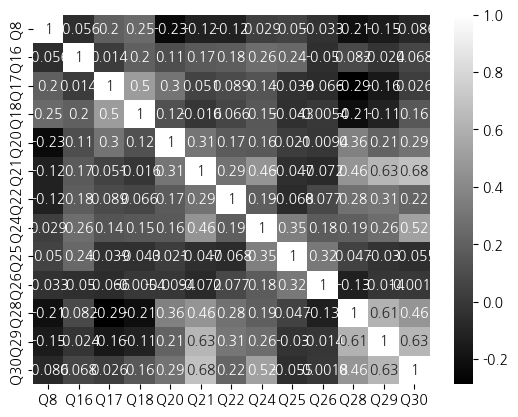

In [ ]:
sns.heatmap(corr, cmap="gray", annot = True)
plt.show()

ANOVA 분석

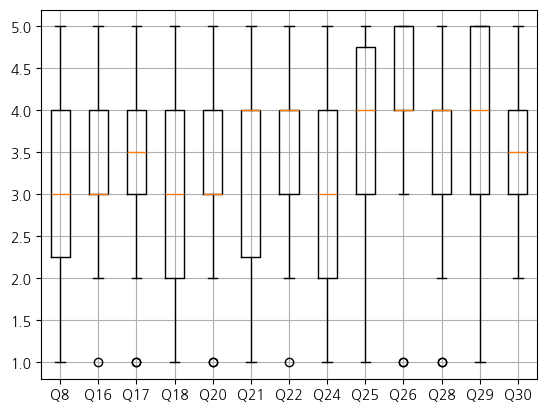

F=9.0, p-value=0.000


In [ ]:
plot_data = answer_P[["Q8", "Q16", "Q17", "Q18", "Q20", "Q21", "Q22", "Q24", "Q25", "Q26", "Q28", "Q29", "Q30"]]
plt.boxplot(plot_data)

plt.xticks(range(1, len(plot_data.columns) + 1), plot_data.columns)
plt.grid(True)
plt.show()

for col in ["Q8", "Q16", "Q17", "Q18", "Q20", "Q21", "Q22", "Q24", "Q25", "Q26", "Q28", "Q29", "Q30"]:
    answer_P[col] = pd.to_numeric(answer_P[col], errors='coerce')

# Perform ANOVA test with numeric data
F_statistic, pVal = stats.f_oneway(
    answer_P["Q8"].dropna(),

    answer_P["Q16"].dropna(),
    answer_P["Q17"].dropna(),
    answer_P["Q18"].dropna(),

    answer_P["Q20"].dropna(),
    answer_P["Q21"].dropna(),
    answer_P["Q22"].dropna(),

    answer_P["Q24"].dropna(),
    answer_P["Q25"].dropna(),
    answer_P["Q26"].dropna(),

    answer_P["Q28"].dropna(),
    answer_P["Q29"].dropna(),
    answer_P["Q30"].dropna()
)

print('F={0:.1f}, p-value={1:.3f}'.format(F_statistic, pVal))


In [ ]:
from sklearn.cluster import KMeans
answer_clust = answer_P[["Q8", "Q16", "Q17", "Q18", "Q20", "Q21", "Q22", "Q24", "Q25", "Q26", "Q28", "Q29", "Q30"]]


kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(answer_clust)

KMeans(n_clusters=5, random_state=0)

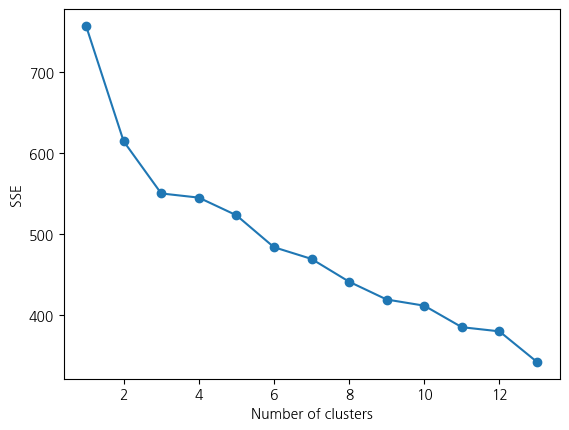

In [ ]:
sse = []
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(answer_clust)
    sse.append(kmeans.inertia_)

# SSE 그래프 그리기
plt.plot(range(1, 14), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

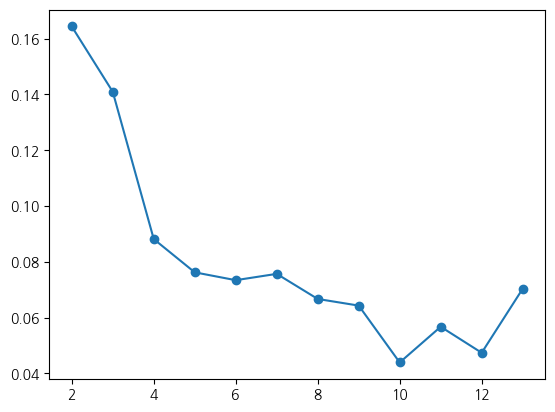

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 실루엣 분석을 사용하여 최적의 K값 탐색
silhouette_scores = []
for k in range(2, 14):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(answer_clust)
    score = silhouette_score(answer_clust, kmeans.labels_)
    silhouette_scores.append(score)

# 실루엣 분석 그래프 그리기
plt.plot(range(2, 14), silhouette_scores, marker='o')

In [ ]:
# labels_ 속성값 출력
print(kmeans.labels_)

[ 3  9  4  4 12 11  4 10  4 12 10 12  8  2  2  1 11  5  9  1  9  1  3 11
  9  2  2  2  6  2  3 11  1 10  0 12  1  1  7 10  7  7  1  7  7  4 11 12
  8  2  4  9 10  5  7 10 12  4  4  4  7  9]


In [ ]:
# answer_clust['target'] = answer_clust['Q8']
answer_clust['target'] = answer['Q8']
answer_clust['cluster'] = kmeans.labels_
# Since your data likely doesn't have 'sepal_length', I am assuming you want to count the instances in each group.
# Please replace 'relevant_column' with the actual column name you want to analyze.
result = answer_clust.groupby(['target', 'cluster'])["Q18"].count()
print(result)

target      cluster
대체로 그렇다     2          3
            3          1
            4          7
            6          1
            8          1
            9          3
            10         1
            12         3
대체로 그렇지 않다  1          3
            4          1
            5          2
            7          4
            10         1
            11         4
매우 그렇다      2          3
            3          2
            12         1
보통이다        0          1
            1          3
            2          1
            4          1
            7          3
            8          1
            9          3
            10         4
            11         1
            12         2
전혀 그렇지 않다   1          1
Name: Q18, dtype: int64


<ipython-input-153-d6d6887f059a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_clust['target'] = answer['Q8']
<ipython-input-153-d6d6887f059a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_clust['cluster'] = kmeans.labels_


In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=7)
# pca_transformed = pca.fit_transform(answer_clust)

# answer_clust['pca_x'] = pca_transformed[:,0]
# answer_clust['pca_y'] = pca_transformed[:,1]
# print(pca.explained_variance_ratio_)
# answer_clust

In [ ]:
# Convert categorical columns to numerical using one-hot encoding or label encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
# Assuming 'Q17', 'Q18', ... are your categorical columns
categorical_cols = ["Q16", "Q17", "Q18", "Q20", "Q21", "Q22", "Q24", "Q25", "Q26", "Q28", "Q29", "Q30", 'target']

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate through the categorical columns and encode them
for col in categorical_cols:
    if answer_clust[col].dtype == 'object':  # Check if the column is of object type (string)
        answer_clust[col] = encoder.fit_transform(answer_clust[col])

# Now you can apply PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(answer_clust)

answer_clust['pca_x'] = pca_transformed[:,0]
answer_clust['pca_y'] = pca_transformed[:,1]
print(pca.explained_variance_ratio_)
answer_clust.head(3)


[0.53087668 0.10853891]


<ipython-input-155-b10596381c0d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_clust[col] = encoder.fit_transform(answer_clust[col])
<ipython-input-155-b10596381c0d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_clust['pca_x'] = pca_transformed[:,0]
<ipython-input-155-b10596381c0d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Q8  Q16  Q17  Q18  Q20  Q21  Q22  Q24  Q25  Q26  Q28  Q29  Q30  target  \
1   5    3    4    3    3    3    3    2    3    3    2    3    3       2   
2   4    3    4    3    3    2    2    2    3    5    2    3    3       0   
3   4    4    4    4    4    4    4    4    4    5    4    5    4       0   

   cluster     pca_x     pca_y  
1        3 -2.900994 -2.384221  
2        9  3.076856 -1.957550  
3        4 -2.442704  1.968096

In [ ]:
# PCA 주성분분석
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0    0.530877
1    0.639416
dtype: float64

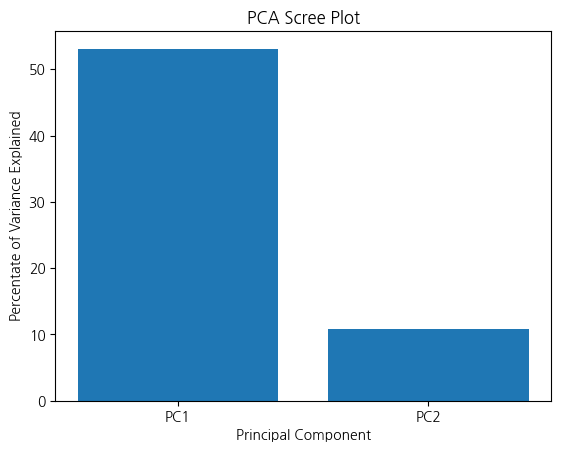

In [ ]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')


ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

[0.53087668 0.10853891]
0.6394155889672254
None


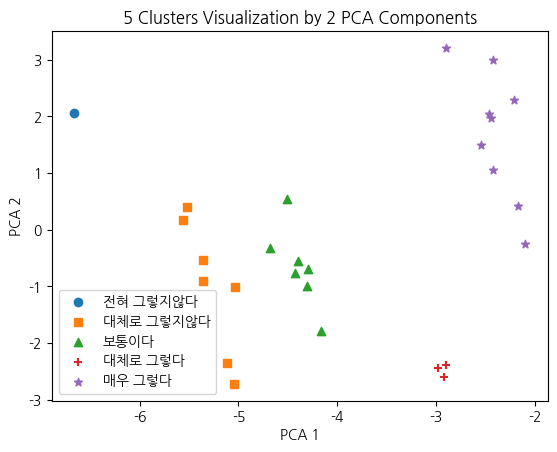

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker1_ind = answer_clust[answer_clust['cluster']==0].index
marker2_ind = answer_clust[answer_clust['cluster']==1].index
marker3_ind = answer_clust[answer_clust['cluster']==2].index
marker4_ind = answer_clust[answer_clust['cluster']==3].index
marker5_ind = answer_clust[answer_clust['cluster']==4].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=answer_clust.loc[marker1_ind, 'pca_x'], y=answer_clust.loc[marker1_ind, 'pca_y'], marker='o')
plt.scatter(x=answer_clust.loc[marker2_ind, 'pca_x'], y=answer_clust.loc[marker2_ind, 'pca_y'], marker='s')
plt.scatter(x=answer_clust.loc[marker3_ind, 'pca_x'], y=answer_clust.loc[marker3_ind, 'pca_y'], marker='^')
plt.scatter(x=answer_clust.loc[marker4_ind, 'pca_x'], y=answer_clust.loc[marker4_ind, 'pca_y'], marker='+')
plt.scatter(x=answer_clust.loc[marker5_ind, 'pca_x'], y=answer_clust.loc[marker5_ind, 'pca_y'], marker='*')
plt.legend(['전혀 그렇지않다', '대체로 그렇지않다', '보통이다', '대체로 그렇다', '매우 그렇다'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('5 Clusters Visualization by 2 PCA Components')
print(pca.explained_variance_ratio_)
print(print(pca.explained_variance_ratio_.sum()))
plt.show()

In [ ]:
for index in answer_P.index:
  if answer_P.loc[index,"Q8"] == 2:
    answer_P.loc[index,"Q8"] = 1
  elif answer_P.loc[index,"Q8"] == 3:
    answer_P.loc[index,"Q8"] = 2
  elif answer_P.loc[index,"Q8"] == 4:
    answer_P.loc[index,"Q8"] = 3
  elif answer_P.loc[index, "Q8"] == 5 :
    answer_P.loc[index,"Q8"] = 3



# answer_clust = answer_P[["Q8","Q32"]]


kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)

kmeans.fit(answer_clust)


KMeans(n_clusters=3, random_state=0)

In [ ]:
print(kmeans.labels_)

[2 1 2 2 1 1 2 1 2 1 1 1 1 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 1 2 2 1 2 1 0 1 2
 2 1 1 1 1 2 1 1 2 1 1 1 2 2 1 1 2 1 1 1 2 2 2 1 1]


In [ ]:
# # Convert categorical columns to numerical using one-hot encoding or label encoding
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Assuming 'Q17', 'Q18', ... are your categorical columns
# categorical_cols = ['Q17', 'Q18', 'Q21', 'Q26', 'Q28', 'Q29', 'Q30', 'target']

# # Create a LabelEncoder object
# encoder = LabelEncoder()

# # Iterate through the categorical columns and encode them
# for col in categorical_cols:
#     if answer_clust[col].dtype == 'object':  # Check if the column is of object type (string)
#         answer_clust[col] = encoder.fit_transform(answer_clust[col])

# # Now you can apply PCA
# pca = PCA(n_components=2)
# pca_transformed = pca.fit_transform(answer_clust)

# answer_clust['pca_x'] = pca_transformed[:,0]
# answer_clust['pca_y'] = pca_transformed[:,1]
# print(pca.explained_variance_ratio_)
# answer_clust.head(3)


In [ ]:
answer_clust['target'] = answer_P['Q8']
answer_clust['cluster'] = kmeans.labels_
# Since your data likely doesn't have 'sepal_length', I am assuming you want to count the instances in each group.
# Please replace 'relevant_column' with the actual column name you want to analyze.
result = answer_clust.groupby(['target', 'cluster'])["Q8"].count()
print(result)

target  cluster
1       1           9
        2           7
2       0           1
        1          14
        2           5
3       1          10
        2          16
Name: Q8, dtype: int64


<ipython-input-162-0370811489f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_clust['target'] = answer_P['Q8']
<ipython-input-162-0370811489f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_clust['cluster'] = kmeans.labels_


In [ ]:

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(answer_clust)

answer_clust['pca_x'] = pca_transformed[:,0]
answer_clust['pca_y'] = pca_transformed[:,1]
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
answer_clust.head(3)

[0.51036353 0.19266647]
0.7030299916610981


<ipython-input-163-ce9ccb69fc1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_clust['pca_x'] = pca_transformed[:,0]
<ipython-input-163-ce9ccb69fc1c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_clust['pca_y'] = pca_transformed[:,1]


Q8  Q16  Q17  Q18  Q20  Q21  Q22  Q24  Q25  Q26  Q28  Q29  Q30  target  \
1   5    3    4    3    3    3    3    2    3    3    2    3    3       3   
2   4    3    4    3    3    2    2    2    3    5    2    3    3       3   
3   4    4    4    4    4    4    4    4    4    5    4    5    4       3   

   cluster     pca_x     pca_y  
1        2 -2.428231 -3.512421  
2        1  3.569309 -2.775868  
3        2 -2.785209  2.409223

In [ ]:
# PCA 주성분분석
pd.Series(np.cumsum(pca.explained_variance_ratio_))


0    0.510364
1    0.703030
dtype: float64

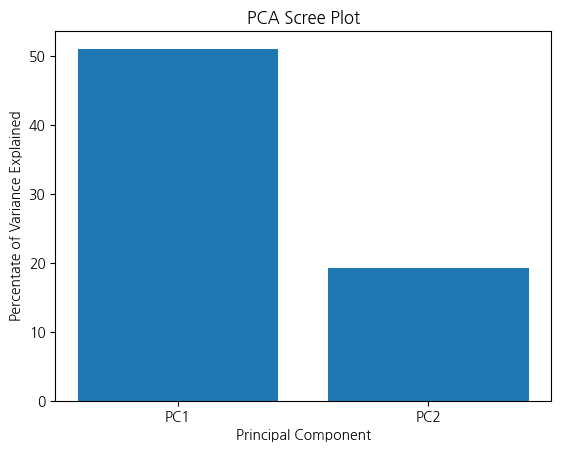

In [ ]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')


ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

군집분석

[0.51036353 0.19266647]
0.7030299916610981
None


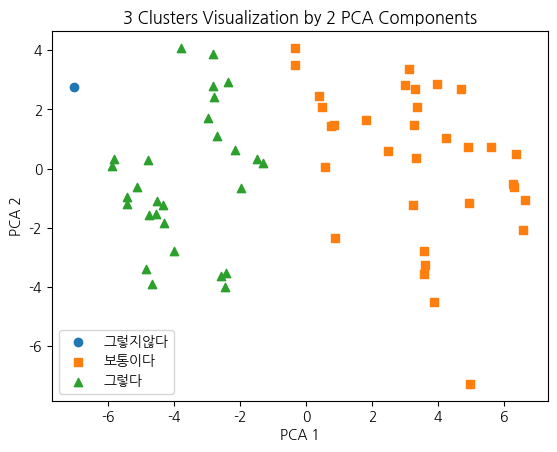

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker1_ind = answer_clust[answer_clust['cluster']==0].index
marker2_ind = answer_clust[answer_clust['cluster']==1].index
marker3_ind = answer_clust[answer_clust['cluster']==2].index


# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=answer_clust.loc[marker1_ind, 'pca_x'], y=answer_clust.loc[marker1_ind, 'pca_y'], marker='o')
plt.scatter(x=answer_clust.loc[marker2_ind, 'pca_x'], y=answer_clust.loc[marker2_ind, 'pca_y'], marker='s')
plt.scatter(x=answer_clust.loc[marker3_ind, 'pca_x'], y=answer_clust.loc[marker3_ind, 'pca_y'], marker='^')

plt.legend(['그렇지않다', '보통이다', '그렇다'])
# plt.legend(['Cluster1', 'Cluster2', 'Cluster3'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
print(pca.explained_variance_ratio_)
print(print(pca.explained_variance_ratio_.sum()))
plt.show()

In [ ]:
pca = PCA()
answer_clust = answer_P[["Q8", "Q16", "Q17", "Q18", "Q20", "Q21", "Q22", "Q24", "Q25", "Q26", "Q28", "Q29", "Q30"]]
pca.fit(answer_clust)
PC_score = pca.transform(answer_clust)
# pca의 eigen_vector
pca.components_

array([[-9.48545724e-02,  1.02146620e-01, -1.21000406e-03,
         8.87487540e-03,  2.60508975e-01,  4.83629744e-01,
         2.90933993e-01,  3.07430079e-01,  2.21313895e-02,
        -3.35683182e-03,  3.75932301e-01,  4.31274097e-01,
         4.14423027e-01],
       [ 2.17412141e-01,  1.67124711e-01,  5.85324729e-01,
         5.98397611e-01,  1.82754235e-01,  1.62373110e-02,
         8.02719040e-02,  2.51152267e-01,  6.64911226e-02,
         4.49809050e-02, -2.67379167e-01, -1.96846176e-01,
         6.51794757e-02],
       [ 4.69288763e-02,  1.83059268e-01, -2.26723821e-01,
        -1.15225399e-01, -1.87068486e-01, -6.05491328e-02,
        -5.59635074e-02,  4.23246894e-01,  5.75921584e-01,
         5.81346250e-01, -6.90697866e-02, -6.30374493e-02,
        -1.68003012e-02],
       [-3.02439659e-01,  1.30604555e-01,  6.02390898e-02,
        -6.72760708e-02,  2.40644324e-01, -2.17588419e-01,
         7.49695231e-01, -2.28188976e-01, -5.97459892e-03,
         2.77273904e-01,  3.31755008e

In [ ]:
ratio = pca.explained_variance_ratio_ #explained_variance 비율로 확인
ratio

array([0.27542046, 0.1568718 , 0.11181796, 0.08708785, 0.07612827,
       0.071577  , 0.0495415 , 0.04839601, 0.03398476, 0.03258732,
       0.02059141, 0.01938753, 0.01660812])

8


pc_ratio
0   0.275420
1   0.156872
2   0.111818
3   0.087088
4   0.076128
5   0.071577
6   0.049541
7   0.048396
8   0.033985
9   0.032587
10  0.020591
11  0.019388
12  0.016608

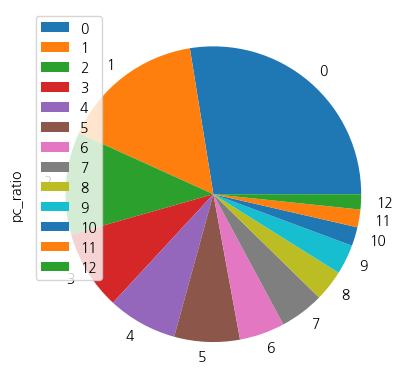

In [ ]:
df_v = pd.DataFrame(ratio, columns=['pc_ratio'])
df_v.plot.pie(y='pc_ratio')

sum = 0
for i in range(len(df_v)) :
  sum += df_v.iloc[i,0]
  if sum >= 0.9 :
    print(i)
    break
df_v

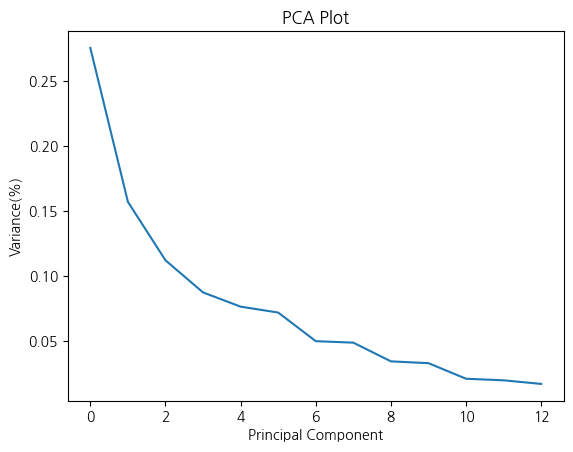

In [ ]:
ax = plt.plot(ratio)
plt.ylabel('Variance(%)')
plt.xlabel('Principal Component')
plt.title('PCA Plot')
plt.show()

In [ ]:
dft = answer_P[["Q8", "Q16", "Q17", "Q18", "Q20", "Q21", "Q22", "Q24", "Q25", "Q26", "Q28", "Q29", "Q30"]]
print( ##Shaprio 검정
stats.shapiro( dft )
## 왜도 측정
      , 'skewness test: {}'.format( abs(stats.skew( dft , bias = False) ) )
      , sep = '\n'
     )


ShapiroResult(statistic=np.float64(0.9097682935288226), pvalue=np.float64(1.9086495891657606e-21))
skewness test: [0.30822575 0.07769406 0.3602672  0.14359991 0.01573913 0.47702848
 0.39122206 0.20645799 0.2403786  1.16721013 0.44952662 0.6442233
 0.10138843]


In [ ]:
from scipy.stats import bartlett
stats.bartlett( dft["Q8"]
         , dft["Q16"]
         , dft["Q17"]
          , dft["Q18"]
          , dft["Q20"]
          , dft["Q21"]
          , dft["Q22"]
          , dft["Q24"]
          , dft["Q25"]
                , dft["Q26"]
                , dft["Q28"]
                , dft["Q29"]
                , dft["Q30"]
        )


stats.levene(dft["Q8"]
         , dft["Q16"]
         , dft["Q17"]
          , dft["Q18"]
          , dft["Q20"]
          , dft["Q21"]
          , dft["Q22"]
          , dft["Q24"]
          , dft["Q25"]
                , dft["Q26"]
                , dft["Q28"]
                , dft["Q29"]
                , dft["Q30"]
        )

LeveneResult(statistic=np.float64(0.6682789102806093), pvalue=np.float64(0.7828393868148089))

 Turkey HSD 사후 분석 방법
  reject = True : 대립가설 채택(평균 차이는 유의미하다)

In [ ]:
import statsmodels.stats.multicomp as mc

# Stack the data and create a group indicator
stacked_data = dft.stack().reset_index()
stacked_data.columns = ['id', 'group', 'value']

# Perform MultiComparison
comp = mc.MultiComparison(stacked_data['value'], stacked_data['group'])
result = comp.tukeyhsd()
print(result)
stacked_data

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Q16    Q17   0.1613 0.9994 -0.4144   0.737  False
   Q16    Q18  -0.4032 0.4974 -0.9789  0.1724  False
   Q16    Q20      0.0    1.0 -0.5757  0.5757  False
   Q16    Q21   0.1129    1.0 -0.4628  0.6886  False
   Q16    Q22   0.4516 0.3077 -0.1241  1.0273  False
   Q16    Q24  -0.2419 0.9747 -0.8176  0.3337  False
   Q16    Q25    0.629 0.0182  0.0534  1.2047   True
   Q16    Q26   0.9355    0.0  0.3598  1.5111   True
   Q16    Q28   0.2097 0.9925  -0.366  0.7853  False
   Q16    Q29   0.6613 0.0093  0.0856   1.237   True
   Q16    Q30   0.1935 0.9964 -0.3821  0.7692  False
   Q16     Q8  -1.0323    0.0 -1.6079 -0.4566   True
   Q17    Q18  -0.5645 0.0608 -1.1402  0.0111  False
   Q17    Q20  -0.1613 0.9994  -0.737  0.4144  False
   Q17    Q21  -0.0484    1.0 -0.6241  0.5273  False
   Q17    Q22   0.2903 0.9039 -0.2853   0.866 

id group  value
0     1    Q8      3
1     1   Q16      3
2     1   Q17      4
3     1   Q18      3
4     1   Q20      3
..   ..   ...    ...
801  62   Q25      3
802  62   Q26      3
803  62   Q28      3
804  62   Q29      3
805  62   Q30      2

[806 rows x 3 columns]

등분산성 검정
  p-value > .05 이기에 그룹간의 등분산성은 만족한다

In [ ]:
# stacked_data.sample(10)
from scipy.stats import bartlett
# Select at least two groups for comparison
group1 = stacked_data["value"][stacked_data["group"] == "Q8"]
group2 = stacked_data["value"][stacked_data["group"] == "Q16"]
group3 = stacked_data["value"][stacked_data["group"] == "Q17"]
group4 = stacked_data["value"][stacked_data["group"] == "Q18"]
group5 = stacked_data["value"][stacked_data["group"] == "Q20"]
group6 = stacked_data["value"][stacked_data["group"] == "Q21"]
group7 = stacked_data["value"][stacked_data["group"] == "Q22"]
group8 = stacked_data["value"][stacked_data["group"] == "Q24"]
group9 = stacked_data["value"][stacked_data["group"] == "Q25"]
group10 = stacked_data["value"][stacked_data["group"] == "Q26"]
group11 = stacked_data["value"][stacked_data["group"] == "Q28"]
group12 = stacked_data["value"][stacked_data["group"] == "Q29"]
group13 = stacked_data["value"][stacked_data["group"] == "Q30"]

# Perform Bartlett's test
stats.bartlett(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12, group13)


BartlettResult(statistic=np.float64(8.59807832469159), pvalue=np.float64(0.7368222040659251))

정규성 검정 및 왜도 검사
*   왜도가 2를 넘지 않기 때문에 분석 가능



In [ ]:
print(stats.shapiro(group1), "Q8 skewness test : {}".format(abs(stats.skew(group1, bias=False))), sep = '\n')#왜도 측정
print(stats.shapiro(group2), "Q16 skewness test : {}".format(abs(stats.skew(group2, bias=False))), sep = '\n')
print(stats.shapiro(group3), "Q17 skewness test : {}".format(abs(stats.skew(group3, bias=False))), sep = '\n')
print(stats.shapiro(group4), "Q18 skewness test : {}".format(abs(stats.skew(group4, bias=False))), sep = '\n')
print(stats.shapiro(group5), "Q20 skewness test : {}".format(abs(stats.skew(group5, bias=False))), sep = '\n')
print(stats.shapiro(group6), "Q21 skewness test : {}".format(abs(stats.skew(group6, bias=False))), sep = '\n')
print(stats.shapiro(group7), "Q22 skewness test : {}".format(abs(stats.skew(group7, bias=False))), sep = '\n')
print(stats.shapiro(group8), "Q24 skewness test : {}".format(abs(stats.skew(group8, bias=False))), sep = '\n')
print(stats.shapiro(group9), "Q25 skewness test : {}".format(abs(stats.skew(group9, bias=False))), sep = '\n')
print(stats.shapiro(group10), "Q26 skewness test : {}".format(abs(stats.skew(group10, bias=False))), sep = '\n')
print(stats.shapiro(group11), "Q28 skewness test : {}".format(abs(stats.skew(group11, bias=False))), sep = '\n')
print(stats.shapiro(group12), "Q29 skewness test : {}".format(abs(stats.skew(group12, bias=False))), sep = '\n')
print(stats.shapiro(group13), "Q30 skewness test : {}".format(abs(stats.skew(group13, bias=False))), sep = '\n')


ShapiroResult(statistic=np.float64(0.7823352509548918), pvalue=np.float64(3.4727279272918956e-08))
Q8 skewness test : 0.30822575082928877
ShapiroResult(statistic=np.float64(0.8866511354698384), pvalue=np.float64(3.395389617820014e-05))
Q16 skewness test : 0.07769406288659192
ShapiroResult(statistic=np.float64(0.8940333516566218), pvalue=np.float64(6.200446564819169e-05))
Q17 skewness test : 0.36026719652281053
ShapiroResult(statistic=np.float64(0.8984594311631358), pvalue=np.float64(8.986584356054209e-05))
Q18 skewness test : 0.14359990887245472
ShapiroResult(statistic=np.float64(0.9080092026764213), pvalue=np.float64(0.00020572832349621746))
Q20 skewness test : 0.015739127718966385
ShapiroResult(statistic=np.float64(0.8715644655486584), pvalue=np.float64(1.0529793133528238e-05))
Q21 skewness test : 0.4770284849219301
ShapiroResult(statistic=np.float64(0.8845850676736756), pvalue=np.float64(2.8790800807641255e-05))
Q22 skewness test : 0.3912220556337409
ShapiroResult(statistic=np.float

Oneway AVONVA 분석
*   F-Ratio가 17로 1을 넘었기 때문에 그룹 간 평균에 차이가 있음을 시사
*   모델의 p-value 또한 유의하기 때문에 17 Ratio를 받아들인다.




In [ ]:
## Stats Model을 활용한 방법1.
F, p = stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12, group13)

print( 'F-Ratio: {}'.format(F)
    , 'p-value:{}'.format(p)
     , sep = '\n')


F-Ratio: 17.229457245711462
p-value:4.282682581981301e-33


In [ ]:
## Stats Model을 활용한 방법2.
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('value ~ C(group)', data = stacked_data).fit()
anova_lm(model)
# stacked_data.columns = ['id', 'group', 'value']

df      sum_sq    mean_sq          F        PR(>F)
C(group)   12.0  192.354839  16.029570  17.229457  4.282683e-33
Residual  793.0  737.774194   0.930358        NaN           NaN

사후분석

In [ ]:
## Turkey HSD 방식
comp = mc.MultiComparison(stacked_data['value'], stacked_data['group'])
result = comp.tukeyhsd()
result.summary()



<class 'statsmodels.iolib.table.SimpleTable'>

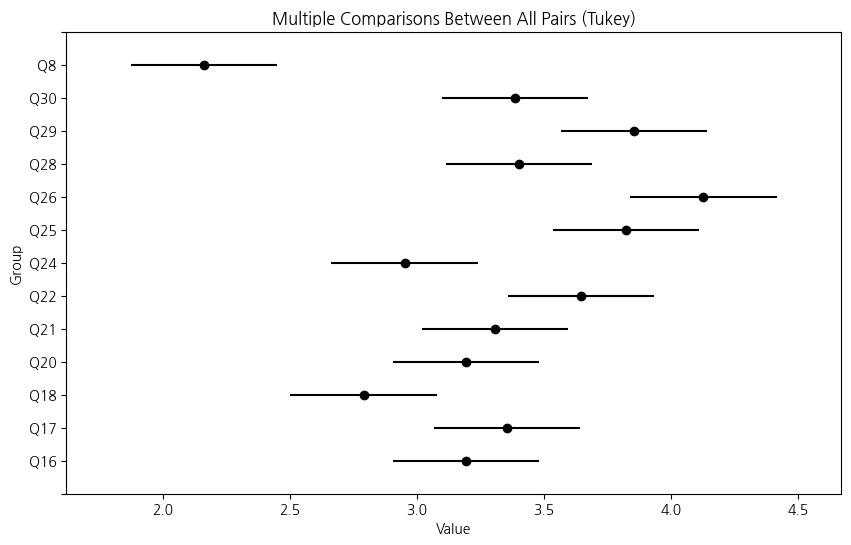

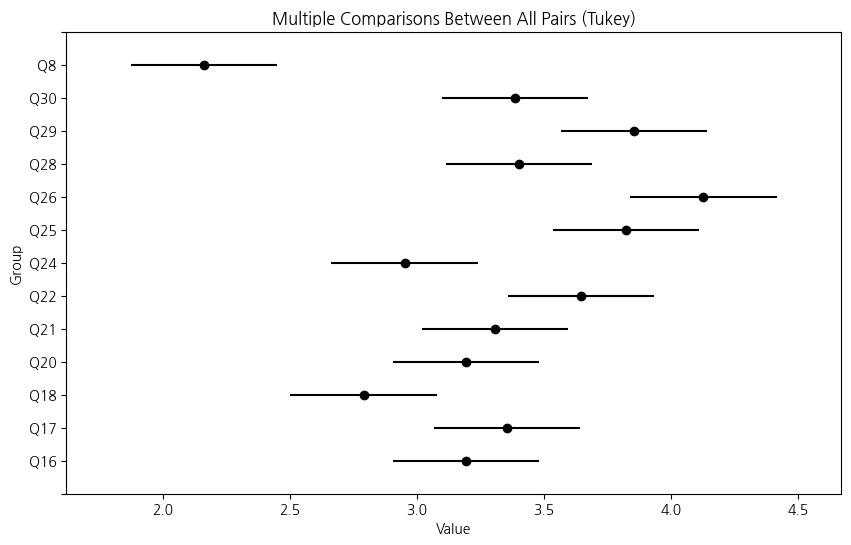

In [ ]:
result.plot_simultaneous(ylabel="Group", xlabel="Value")

BONFERRONI 방식

In [ ]:
## BONFERRONI 방식
comp = mc.MultiComparison(stacked_data['value'], stacked_data['group'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

<class 'statsmodels.iolib.table.SimpleTable'>

# 재시도

In [ ]:
from sklearn.cluster import KMeans
answer_clust = answer_P[["Q8", "Q21",  "Q24",  "Q28", "Q29", "Q30"]]


kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(answer_clust)

KMeans(n_clusters=5, random_state=0)

In [ ]:
corr = answer_A[["Q8", "Q16", "Q17", "Q18", "Q20", "Q21", "Q22", "Q24", "Q25", "Q26", "Q28", "Q29", "Q30"]].corr()
corr

Q8       Q16       Q17       Q18       Q20       Q21       Q22  \
Q8   1.000000 -0.055750  0.195337  0.249077 -0.233573 -0.120290 -0.118927   
Q16 -0.055750  1.000000  0.014149  0.197175  0.108741  0.168296  0.181162   
Q17  0.195337  0.014149  1.000000  0.500006  0.296020  0.051236  0.089328   
Q18  0.249077  0.197175  0.500006  1.000000  0.123292 -0.015710  0.066355   
Q20 -0.233573  0.108741  0.296020  0.123292  1.000000  0.305175  0.173944   
Q21 -0.120290  0.168296  0.051236 -0.015710  0.305175  1.000000  0.287494   
Q22 -0.118927  0.181162  0.089328  0.066355  0.173944  0.287494  1.000000   
Q24  0.029195  0.261926  0.135492  0.154789  0.161659  0.459924  0.185695   
Q25  0.050354  0.240068 -0.039401 -0.042611  0.021307 -0.046764 -0.067921   
Q26 -0.033280 -0.049957 -0.065553 -0.005416 -0.009405 -0.071960  0.076519   
Q28 -0.207258  0.081611 -0.288227 -0.214289  0.363084  0.458288  0.282728   
Q29 -0.148199 -0.024093 -0.163596 -0.112958  0.213485  0.627841  0.305981   
Q30 -0.085920  0.068372  0.026344  0.157651  0.291606  0.683049  0.222207   

          Q24       Q25       Q26       Q28       Q29       Q30  
Q8   0.029195  0.050354 -0.033280 -0.207258 -0.148199 -0.085920  
Q16  0.261926  0.240068 -0.049957  0.081611 -0.024093  0.068372  
Q17  0.135492 -0.039401 -0.065553 -0.288227 -0.163596  0.026344  
Q18  0.154789 -0.042611 -0.005416 -0.214289 -0.112958  0.157651  
Q20  0.161659  0.021307 -0.009405  0.363084  0.213485  0.291606  
Q21  0.459924 -0.046764 -0.071960  0.458288  0.627841  0.683049  
Q22  0.185695 -0.067921  0.076519  0.282728  0.305981  0.222207  
Q24  1.000000  0.350954  0.179386  0.193674  0.262592  0.523565  
Q25  0.350954  1.000000  0.317153  0.047063 -0.030131 -0.055060  
Q26  0.179386  0.317153  1.000000 -0.126894 -0.014382 -0.001766  
Q28  0.193674  0.047063 -0.126894  1.000000  0.611238  0.462309  
Q29  0.262592 -0.030131 -0.014382  0.611238  1.000000  0.632590  
Q30  0.523565 -0.055060 -0.001766  0.462309  0.632590  1.000000

ANOVA분석

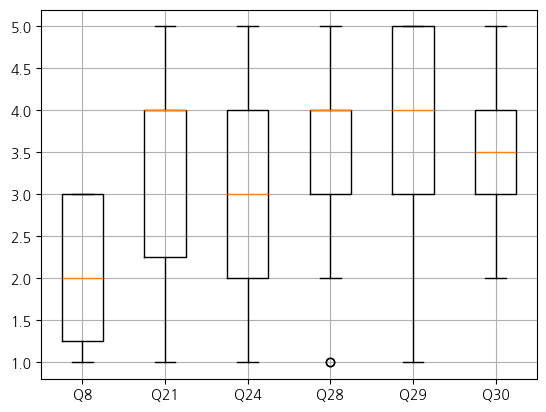

F=22.4, p-value=0.000


In [ ]:
plot_data = answer_P[["Q8", "Q21",  "Q24",  "Q28", "Q29", "Q30"]]
plt.boxplot(plot_data)

plt.xticks(range(1, len(plot_data.columns) + 1), plot_data.columns)
plt.grid(True)
plt.show()

for col in ["Q8", "Q21",  "Q24",  "Q28", "Q29", "Q30"]:
    answer_P[col] = pd.to_numeric(answer_P[col], errors='coerce')

# Perform ANOVA test with numeric data
F_statistic, pVal = stats.f_oneway(
    answer_P["Q8"].dropna(),




    answer_P["Q21"].dropna(),


    answer_P["Q24"].dropna(),


    answer_P["Q28"].dropna(),
    answer_P["Q29"].dropna(),
    answer_P["Q30"].dropna()
)

print('F={0:.1f}, p-value={1:.3f}'.format(F_statistic, pVal))




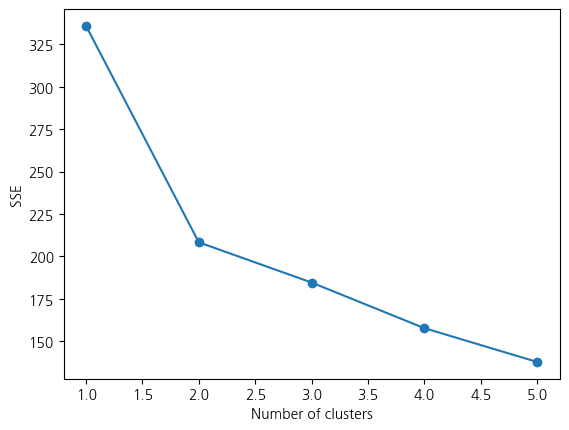

In [ ]:
sse = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(answer_clust)
    sse.append(kmeans.inertia_)

# SSE 그래프 그리기
plt.plot(range(1, 6), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

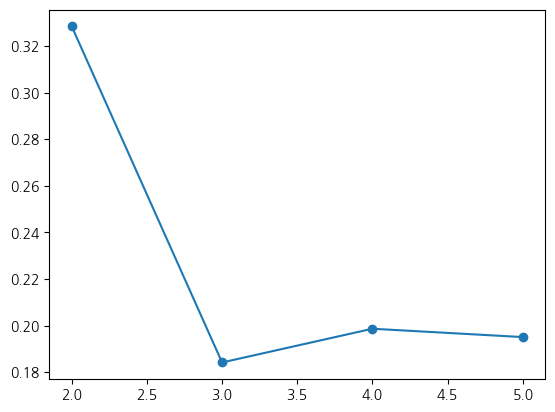

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 실루엣 분석을 사용하여 최적의 K값 탐색
silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(answer_clust)
    score = silhouette_score(answer_clust, kmeans.labels_)
    silhouette_scores.append(score)

# 실루엣 분석 그래프 그리기
plt.plot(range(2, 6), silhouette_scores, marker='o')

In [ ]:
# labels_ 속성값 출력
print(kmeans.labels_)

[4 4 0 0 2 2 0 3 0 4 0 2 2 2 1 1 3 3 1 1 4 3 4 3 2 0 2 2 2 3 1 1 2 3 0 1 1
 3 2 3 1 0 3 2 3 3 3 4 2 3 2 4 3 3 3 3 4 3 0 0 0 1]


In [ ]:
answer_clust['target'] = answer['Q8']
answer_clust['cluster'] = kmeans.labels_

result = answer_clust.groupby(['target', 'cluster'])["Q8"].count()
print(result)


target      cluster
대체로 그렇다     0           8
            1           4
            2           6
            4           2
대체로 그렇지 않다  1           2
            2           3
            3          10
매우 그렇다      1           1
            2           2
            3           1
            4           2
보통이다        0           3
            1           2
            2           3
            3           8
            4           4
전혀 그렇지 않다   1           1
Name: Q8, dtype: int64


<ipython-input-187-1e5ea0621cde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_clust['target'] = answer['Q8']
<ipython-input-187-1e5ea0621cde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_clust['cluster'] = kmeans.labels_


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

categorical_cols = ["Q21",  "Q24",  "Q28", "Q29", "Q30", 'target']


encoder = LabelEncoder()


for col in categorical_cols:
    if answer_clust[col].dtype == 'object':
        answer_clust[col] = encoder.fit_transform(answer_clust[col])


pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(answer_clust)

answer_clust['pca_x'] = pca_transformed[:,0]
answer_clust['pca_y'] = pca_transformed[:,1]
print(pca.explained_variance_ratio_)
answer_clust.head(3)

[0.38909946 0.23500748]


<ipython-input-188-6623e5161fd8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_clust[col] = encoder.fit_transform(answer_clust[col])
<ipython-input-188-6623e5161fd8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_clust['pca_x'] = pca_transformed[:,0]
<ipython-input-188-6623e5161fd8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Q8  Q21  Q24  Q28  Q29  Q30  target  cluster     pca_x     pca_y
1   3    3    2    2    3    3       2        4  2.499388  0.237040
2   3    2    2    2    3    3       0        4  2.391152 -1.459960
3   3    4    4    4    5    4       0        0 -2.917355 -1.319985

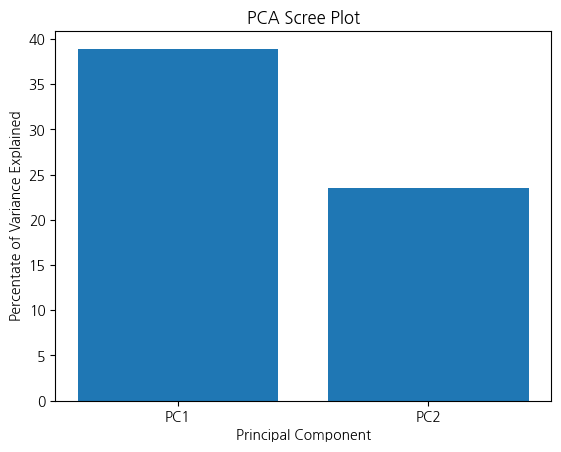

In [ ]:
# PCA 주성분분석
pd.Series(np.cumsum(pca.explained_variance_ratio_))



percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')


ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

[0.38909946 0.23500748]
0.6241069370574286
None


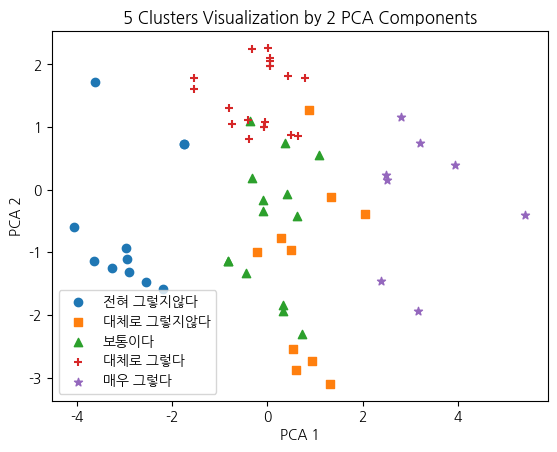

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker1_ind = answer_clust[answer_clust['cluster']==0].index
marker2_ind = answer_clust[answer_clust['cluster']==1].index
marker3_ind = answer_clust[answer_clust['cluster']==2].index
marker4_ind = answer_clust[answer_clust['cluster']==3].index
marker5_ind = answer_clust[answer_clust['cluster']==4].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=answer_clust.loc[marker1_ind, 'pca_x'], y=answer_clust.loc[marker1_ind, 'pca_y'], marker='o')
plt.scatter(x=answer_clust.loc[marker2_ind, 'pca_x'], y=answer_clust.loc[marker2_ind, 'pca_y'], marker='s')
plt.scatter(x=answer_clust.loc[marker3_ind, 'pca_x'], y=answer_clust.loc[marker3_ind, 'pca_y'], marker='^')
plt.scatter(x=answer_clust.loc[marker4_ind, 'pca_x'], y=answer_clust.loc[marker4_ind, 'pca_y'], marker='+')
plt.scatter(x=answer_clust.loc[marker5_ind, 'pca_x'], y=answer_clust.loc[marker5_ind, 'pca_y'], marker='*')
plt.legend(['전혀 그렇지않다', '대체로 그렇지않다', '보통이다', '대체로 그렇다', '매우 그렇다'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('5 Clusters Visualization by 2 PCA Components')
print(pca.explained_variance_ratio_)
print(print(pca.explained_variance_ratio_.sum()))
plt.show()

In [ ]:
for index in answer_P.index:
  if answer_P.loc[index,"Q8"] == 2:
    answer_P.loc[index,"Q8"] = 1
  elif answer_P.loc[index,"Q8"] == 3:
    answer_P.loc[index,"Q8"] = 2
  elif answer_P.loc[index,"Q8"] == 4:
    answer_P.loc[index,"Q8"] = 3
  elif answer_P.loc[index, "Q8"] == 5 :
    answer_P.loc[index,"Q8"] = 3



# answer_clust = answer_P[["Q8","Q32"]]


kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)

kmeans.fit(answer_clust)


KMeans(n_clusters=3, random_state=0)

In [ ]:
answer_clust['target'] = answer_P['Q8']
answer_clust['cluster'] = kmeans.labels_
# Since your data likely doesn't have 'sepal_length', I am assuming you want to count the instances in each group.
# Please replace 'relevant_column' with the actual column name you want to analyze.
result = answer_clust.groupby(['target', 'cluster'])["Q8"].count()
print(result)

target  cluster
1       0           3
        1          12
        2          21
2       0           8
        1          16
        2           2
Name: Q8, dtype: int64


<ipython-input-192-0370811489f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_clust['target'] = answer_P['Q8']
<ipython-input-192-0370811489f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_clust['cluster'] = kmeans.labels_


In [ ]:

pca = PCA(n_components=8)
pca_transformed = pca.fit_transform(answer_clust)

answer_clust['pca_x'] = pca_transformed[:,0]
answer_clust['pca_y'] = pca_transformed[:,1]
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
answer_clust.head(3)

[0.52501796 0.26381655 0.0723707  0.04638733 0.02857334 0.0228929
 0.02010611 0.01814791]
0.9973128004176887


<ipython-input-193-e76a2ed64d72>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_clust['pca_x'] = pca_transformed[:,0]
<ipython-input-193-e76a2ed64d72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_clust['pca_y'] = pca_transformed[:,1]


Q8  Q21  Q24  Q28  Q29  Q30  target  cluster     pca_x     pca_y
1   3    3    2    2    3    3       2        1  2.897940  0.319830
2   3    2    2    2    3    3       2        1  3.433051 -1.182104
3   3    4    4    4    5    4       2        0 -3.137993 -2.462220

In [ ]:
# PCA 주성분분석
pd.Series(np.cumsum(pca.explained_variance_ratio_))


0    0.525018
1    0.788835
2    0.861205
3    0.907593
4    0.936166
5    0.959059
6    0.979165
7    0.997313
dtype: float64

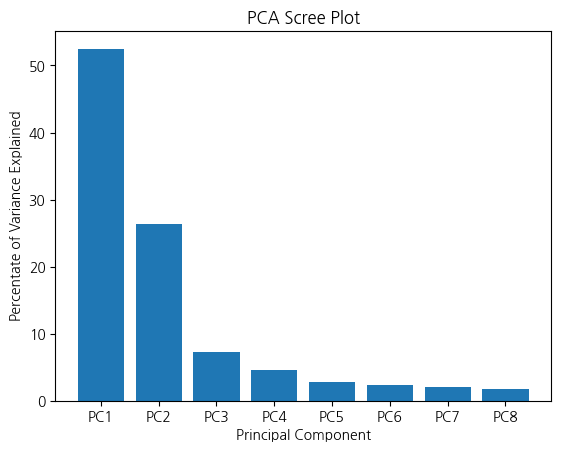

In [ ]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')


ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

군집분석

[0.52501796 0.26381655 0.0723707  0.04638733 0.02857334 0.0228929
 0.02010611 0.01814791]
0.9973128004176887
None


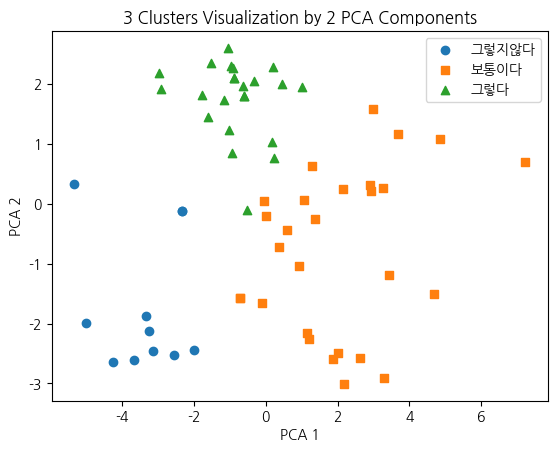

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker1_ind = answer_clust[answer_clust['cluster']==0].index
marker2_ind = answer_clust[answer_clust['cluster']==1].index
marker3_ind = answer_clust[answer_clust['cluster']==2].index


# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=answer_clust.loc[marker1_ind, 'pca_x'], y=answer_clust.loc[marker1_ind, 'pca_y'], marker='o')
plt.scatter(x=answer_clust.loc[marker2_ind, 'pca_x'], y=answer_clust.loc[marker2_ind, 'pca_y'], marker='s')
plt.scatter(x=answer_clust.loc[marker3_ind, 'pca_x'], y=answer_clust.loc[marker3_ind, 'pca_y'], marker='^')

plt.legend(['그렇지않다', '보통이다', '그렇다'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
print(pca.explained_variance_ratio_)
print(print(pca.explained_variance_ratio_.sum()))
plt.show()

In [ ]:
pca = PCA()
answer_clust = answer_P[["Q8", "Q21",  "Q24",  "Q28", "Q29", "Q30"]]
pca.fit(answer_clust)
PC_score = pca.transform(answer_clust)
# pca의 eigen_vector
pca.components_

array([[-2.66704572e-02,  5.30869200e-01,  3.40531132e-01,
         3.93270896e-01,  4.79940532e-01,  4.65295837e-01],
       [ 9.40909667e-02,  9.39002953e-02,  7.56347337e-01,
        -5.09062379e-01, -3.60113795e-01,  1.46430461e-01],
       [ 1.53958302e-01, -5.43304643e-01,  4.54304880e-01,
         6.63851267e-01, -1.36253910e-01, -1.24339655e-01],
       [-2.07620026e-01,  5.97687582e-01, -8.03241240e-04,
         3.46452587e-01, -5.57121199e-01, -4.11399329e-01],
       [ 1.49821428e-01, -5.26846864e-02, -3.12230501e-01,
         1.59517723e-01, -5.56451747e-01,  7.36346065e-01],
       [ 9.49304947e-01,  2.32754314e-01, -8.99766599e-02,
         4.43776718e-03,  3.72482903e-02, -1.87463647e-01]])

In [ ]:
ratio = pca.explained_variance_ratio_ #explained_variance 비율로 확인
ratio

array([0.57493457, 0.17206042, 0.092659  , 0.06412305, 0.05118548,
       0.04503747])

3


pc_ratio
0  0.574935
1  0.172060
2  0.092659
3  0.064123
4  0.051185
5  0.045037

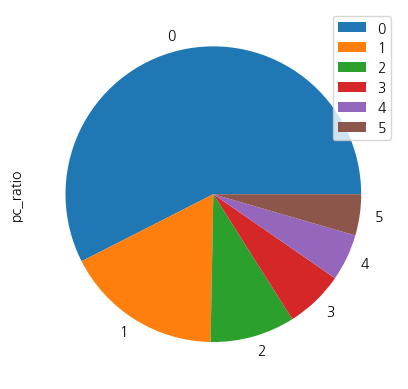

In [ ]:
df_v = pd.DataFrame(ratio, columns=['pc_ratio'])
df_v.plot.pie(y='pc_ratio')

sum = 0
for i in range(len(df_v)) :
  sum += df_v.iloc[i,0]
  if sum >= 0.9 :
    print(i)
    break
df_v

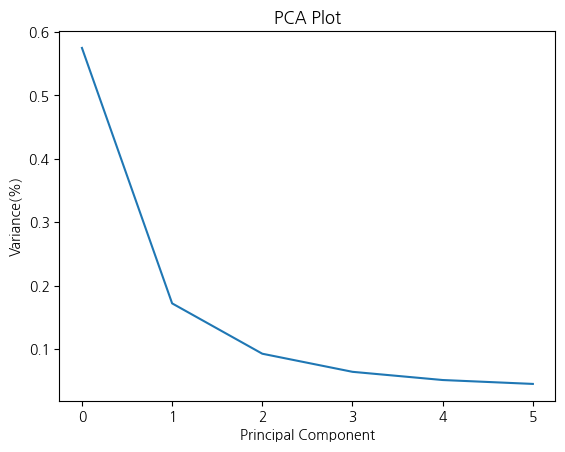

In [ ]:
ax = plt.plot(ratio)
plt.ylabel('Variance(%)')
plt.xlabel('Principal Component')
plt.title('PCA Plot')
plt.show()

In [ ]:
dft = answer_P[["Q8", "Q21",  "Q24",  "Q28", "Q29", "Q30"]]
print( ##Shaprio 검정
stats.shapiro( dft )
## 왜도 측정
      , 'skewness test: {}'.format( abs(stats.skew( dft , bias = False) ) )
      , sep = '\n'
     )


ShapiroResult(statistic=np.float64(0.9069100106208328), pvalue=np.float64(2.3824284305205265e-14))
skewness test: [0.33502066 0.47702848 0.20645799 0.44952662 0.6442233  0.10138843]


In [ ]:
from scipy.stats import bartlett
stats.bartlett( dft["Q8"]
         , dft["Q21"]
          , dft["Q24"]
          , dft["Q28"]
                , dft["Q29"]
                , dft["Q30"]
        )


stats.levene(dft["Q8"]
         , dft["Q21"]
          , dft["Q24"]
          , dft["Q28"]
                , dft["Q29"]
                , dft["Q30"]
        )

LeveneResult(statistic=np.float64(3.140839096357767), pvalue=np.float64(0.008641235056627661))

 Turkey HSD 사후 분석 방법
  reject = True : 대립가설 채택(평균 차이는 유의미하다)

In [ ]:
import statsmodels.stats.multicomp as mc # import the module with the alias mc

# Stack the data and create a group indicator
stacked_data = dft.stack().reset_index()
stacked_data.columns = ['id', 'group', 'value']

# Perform MultiComparison
comp = mc.MultiComparison(stacked_data['value'], stacked_data['group'])
result = comp.tukeyhsd()
print(result)
stacked_data

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Q21    Q24  -0.3548 0.2666 -0.8287  0.1191  False
   Q21    Q28   0.0968  0.992 -0.3771  0.5707  False
   Q21    Q29   0.5484 0.0128  0.0745  1.0223   True
   Q21    Q30   0.0806 0.9966 -0.3933  0.5545  False
   Q21     Q8  -1.8871    0.0  -2.361 -1.4132   True
   Q24    Q28   0.4516 0.0718 -0.0223  0.9255  False
   Q24    Q29   0.9032    0.0  0.4293  1.3771   True
   Q24    Q30   0.4355 0.0921 -0.0384  0.9094  False
   Q24     Q8  -1.5323    0.0 -2.0062 -1.0584   True
   Q28    Q29   0.4516 0.0718 -0.0223  0.9255  False
   Q28    Q30  -0.0161    1.0   -0.49  0.4578  False
   Q28     Q8  -1.9839    0.0 -2.4578   -1.51   True
   Q29    Q30  -0.4677 0.0554 -0.9416  0.0062  False
   Q29     Q8  -2.4355    0.0 -2.9094 -1.9616   True
   Q30     Q8  -1.9677    0.0 -2.4416 -1.4938   True
----------------------------------------------

id group  value
0     1    Q8      2
1     1   Q21      3
2     1   Q24      2
3     1   Q28      2
4     1   Q29      3
..   ..   ...    ...
367  62   Q21      2
368  62   Q24      2
369  62   Q28      3
370  62   Q29      3
371  62   Q30      2

[372 rows x 3 columns]

등분산성 검정 p < 0.05

In [ ]:
# stacked_data.sample(10)
from scipy.stats import bartlett
# Select at least two groups for comparison
group1 = stacked_data["value"][stacked_data["group"] == "Q8"]
group2 = stacked_data["value"][stacked_data["group"] == "Q21"]
group3 = stacked_data["value"][stacked_data["group"] == "Q24"]
group4 = stacked_data["value"][stacked_data["group"] == "Q28"]
group5 = stacked_data["value"][stacked_data["group"] == "Q29"]
group6 = stacked_data["value"][stacked_data["group"] == "Q30"]

# Perform Bartlett's test
stats.bartlett(group1, group2, group3, group4, group5, group6)


BartlettResult(statistic=np.float64(35.46262250326396), pvalue=np.float64(1.2163589962849764e-06))

In [ ]:
print(stats.shapiro(group1), "Q8 skewness test : {}".format(abs(stats.skew(group1, bias=False))), sep = '\n')#왜도 측정

print(stats.shapiro(group2), "Q21 skewness test : {}".format(abs(stats.skew(group6, bias=False))), sep = '\n')
print(stats.shapiro(group3), "Q24 skewness test : {}".format(abs(stats.skew(group8, bias=False))), sep = '\n')
print(stats.shapiro(group4), "Q28 skewness test : {}".format(abs(stats.skew(group11, bias=False))), sep = '\n')
print(stats.shapiro(group5), "Q29 skewness test : {}".format(abs(stats.skew(group12, bias=False))), sep = '\n')
print(stats.shapiro(group6), "Q30 skewness test : {}".format(abs(stats.skew(group13, bias=False))), sep = '\n')


ShapiroResult(statistic=np.float64(0.6270643814317787), pvalue=np.float64(2.7748932000055487e-11))
Q8 skewness test : 0.3350206581772351
ShapiroResult(statistic=np.float64(0.8715644655486584), pvalue=np.float64(1.0529793133528238e-05))
Q21 skewness test : 0.10138843207970877
ShapiroResult(statistic=np.float64(0.9046419726703919), pvalue=np.float64(0.0001529449916606347))
Q24 skewness test : 0.2064579862190981
ShapiroResult(statistic=np.float64(0.8890733030504405), pvalue=np.float64(4.127881233133244e-05))
Q28 skewness test : 0.44952662332186905
ShapiroResult(statistic=np.float64(0.8679615568098374), pvalue=np.float64(8.049195040690836e-06))
Q29 skewness test : 0.6442233009877912
ShapiroResult(statistic=np.float64(0.8669467930734616), pvalue=np.float64(7.468008317348954e-06))
Q30 skewness test : 0.10138843207970877


Oneway AVONVA 분석
*   F-Ratio가 17로 1을 넘었기 때문에 그룹 간 평균에 차이가 있음을 시사
*   모델의 p-value 또한 유의하기 때문에 17 Ratio를 받아들인다.




In [ ]:
## Stats Model을 활용한 방법1.
F, p = stats.f_oneway(group1, group2, group3, group4, group5, group6)

print( 'F-Ratio: {}'.format(F)
    , 'p-value:{}'.format(p)
     , sep = '\n')


F-Ratio: 52.927514546965895
p-value:2.957986806853813e-41


In [ ]:
## Stats Model을 활용한 방법2.
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('value ~ C(group)', data = stacked_data).fit()
anova_lm(model)
# stacked_data.columns = ['id', 'group', 'value']

df      sum_sq    mean_sq          F        PR(>F)
C(group)    5.0  224.473118  44.894624  52.927515  2.957987e-41
Residual  366.0  310.451613   0.848228        NaN           NaN

사후분석

In [ ]:
## Turkey HSD 방식
comp = mc.MultiComparison(stacked_data['value'], stacked_data['group'])
result = comp.tukeyhsd()
result.summary()



<class 'statsmodels.iolib.table.SimpleTable'>

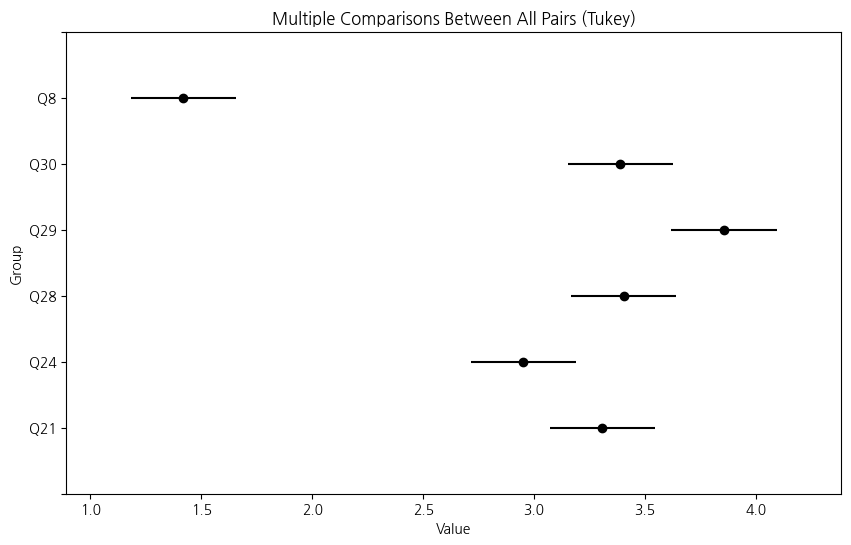

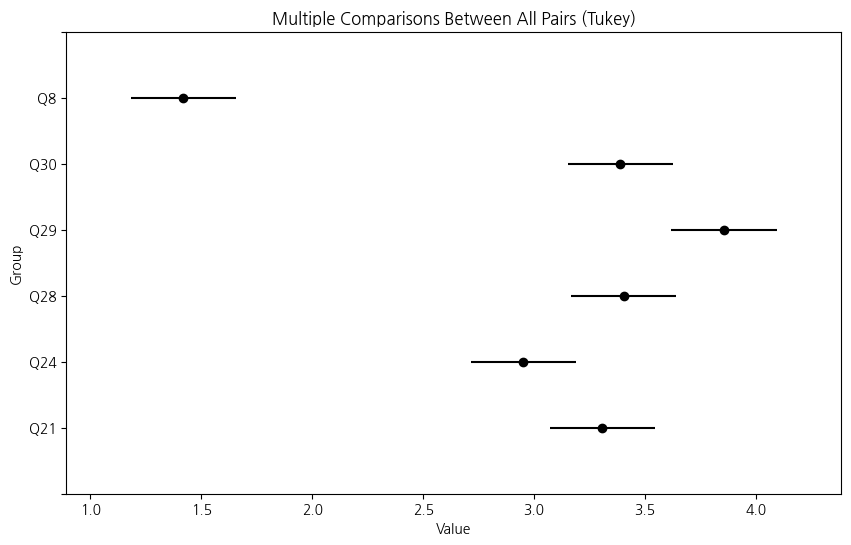

In [ ]:
result.plot_simultaneous(ylabel="Group", xlabel="Value")

BONFERRONI 방식

In [ ]:
## BONFERRONI 방식
comp = mc.MultiComparison(stacked_data['value'], stacked_data['group'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

<class 'statsmodels.iolib.table.SimpleTable'>